---
title: Measuring Bibliometric Coverage of German Law Journals
author:
- name: Christian Boulanger
  orcid: 0000-0001-6928-3246
  email: boulanger@lhlt.mpg.de
  affiliation:
  - name: Max Planck Institute for Legal History and Legal Theory
    city: Frankfurt
    country: Germany
    url: https://www.lhlt.mpg.de/
- name: Daniel Fejzo
  email: fejzo@lhlt.mpg.de
  affiliation:
    - name: Max Planck Institute for Legal History and Legal Theory
      city: Frankfurt
      country: Germany
      url: https://www.lhlt.mpg.de/
- name: Christine Rimmert
  orcid: 0009-0001-2972-2061
  email: Christine.Rimmert@fiz-Karlsruhe.de
  affiliation:
    - name: FIZ Karlsruhe – Leibniz-Institut für Informationsinfrastruktur
      city: Karlsruhe 
      country: Germany
      url: https://www.fiz-karlsruhe.de
abstract: This paper systematically investigates how the German landscape of law journals is represented in databases used for bibliometric analyses, in particular the Web of Science, Scopus, and OpenAlex. ...
lang: en
date: 2025-02-19
licence: "CC BY"
code-fold: true
project:
  execute-dir: project
execute: 
  cache: true
zotero: true
funding: "The authors received no specific fundings for this work."
bibliography: references.bib
csl: ieee-with-url.csl
format:
  pdf: 
    toc: true
    code-annotations: false
  html:
    toc: true
    embed-resources: false
---

In [3]:
#| echo: false
#| output: false

# set root dir to project, should be set by `project: execute-dir: project` but it's not working
import sys; 
sys.path.append('../')

%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━

## 1. Research question

Bibliometric and scientometric analyses are common in many fields of research, being used for research assessment, i.e. the measurement of scholarly productivity and impact of institutions, journals, or individual scholars, or, alternatively, for science mapping, the empirical analysis of knowledge production in a particular field of scholarship [@vanRaan_2019]. However, this has not been the case for the field of German legal scholarship. One empirical indication of this state of affairs is that, when searching in the full texts of German law journal articles available on JSTOR for the expression "bibliometr\*", there are exactly two hits.[^1]

[^1]: For this ad-hoc experiment, a dataset has been created on constellate.org, consisting of metadata and fulltext of 45233 documents from the German law journals available on this platform: Archiv für Rechts- und Sozialphilosophie, Archiv des öffentlichen Rechts, Archiv für Rechts- und Sozialphilosophie, Archiv für Rechts- und Wirtschaftsphilosophie, Archiv für die civilistische Praxis, Der Staat, KritV, Kritische Justiz, Rabels Zeitschrift für ausländisches und internationales Privatrecht, Zeitschrift für Rechtspolitik, in the period 1900-2023. These journals are not in any way representative for German legal scholarship, but it is unlikely that this sample would contain significantly fewer hits than any other sample of the same size from a complete corpus.

The reason for this could be attributed to the fact that lawyers treat bibliometric analyses with skepticism. As the 2012 Report on the State of German Legal Scholarship and Education states: „Bibliometric methods are not sufficiently capable of measuring research performance in legal scholarship.“ [@germancouncilofscienceandhumanities2012, p. 54]. However, our suspicion is that this situation is equally, if not more so, due to the fact that unlike in other fields of science, there just isn't enough data available on which bibliometric analyses could be based upon.

The purpose of this paper is to empirically test this proposition. It systematically investigates how the German landscape of law journals is represented in the databases used for bibliometric analyses, in particular the Web of Science, Scopus, and OpenAlex.

This research question is subdivided in three sub-questions, which are discussed in separate parts of this paper after shortly surveying previous work. The *first question* asks what exactly we are looking for: what set of publications represents the German law journal landscape? Here, were are not aiming at completeness, but rather at a a sample that is sufficiently large and representative enough to make our observations valid. Based on a previous study that surveyed German law professors to construct a ranking of law journals [@gröls2009], we propose a "gold standard" list of German law journals. Once the sample has been established, the *second question* how much data exists for this sample in our target databases. The *third question* is about data quality: it is not enough to observe the pure quantity of records found for our sample - we also have to investigate how complete and accurate this data is, and what questions can be answered based on it, and which cannot.

Not surprisingly, we conclude that is that the data bears out the initial hypothesis. While the bibliometric coverage of knowledge production in the German legal domain is getting better in recent years, mainly because of the appearance of new players in the market, it is generally still very limited. As most German law journal do not fit the selection criteria of the commercial vendors, the more open offerings such as OpenAlex are the only viable candidate. However, the available metadata is found wanting. In particular, we observe a general lack of citation data. The conclusion sketches some reasons for why this is so and proposes ways forward.

This paper is a interdisciplinary collaboration between two domain specialists and a bibliometrician, and thus tries to combine different epistemic interests: on one hand, in those questions that require the data we are looking for, and on the other, the questions that the data poses itself. We document all queries and the code we used to produce the tables and graphs in the following sections in our GitHub repository.[^2]

[^2]: https://github.com/mpilhlt/XXX.

## 2. Previous and related work

As far as we can see, this is the first study of this kind. Earlier research had put its interest more in the way legal texts cite other legal material, such as the characteristics of references to legal provisions in judgments [@wagner-döbler1993] or the networks that can constructed from references between legal texts [@coupette2019]. For reasons that we will return to in the conclusion, the bibliometric analysis of legal scholarship itself has never become a subject of scholarly attention. In contrast, when looking outside the German legal domain, there have been numerous studies using bibliometric methods to analyze knowledge production of various disciplines, such as, for example of Digital Humanities [@tang2017] or Scientometrics itself [@liu2023].

However, we have not been able to identify other studies - although they might exist - which measure the quality of the bibliometric data *on* a discipline, since, as we will see, this exercise requires data outside the traditional databases - some "gold standard" - against which they can be compared. In most cases, the data quality of databases such as the Web of Science or Scopus is simply assumed - a trust that might not be warranted, in particular in scientific fields where the coverage of these databases is sketchy. This has been empirically shown for the Social Sciences and Humanities (SSH) [@hicks1999; @gläser2019].

In addition, such studies point out that in the fields in SSH, a large part of the research is published as monographs or parts thereof. These publications are even less present in databases which focus on journals, the main form of scientific communication in the natural sciences [@hammarfelt2016]. This is also true for German legal scholarship. However, this plays no role for the analyses in this paper, as our explicit focus is on law journals.[^3]

[^3]: The Research project "Kulturwandel in der Rechtswissenschaft (KidRewi)", which, among other things, investigates the presence of monographic legal scholarship in bibliometric databases (https://openrewi.org/kidrewi/).

## 3. Constructing a gold standard list of German law journals

The first task in measuring the coverage of German law journals in bibliographic databases is to determine which of the journals to look for, i.e. to create a list of journals that represent the category "German law journals". In this endeavour, we do not aim for completeness. For the purpose of this study, it will suffice to have a sample which is sufficiently large to be representative of the field. At the same time, the selection must be small enough to be checked and enriched with additional metadata (for example, a persistent identifier such as the ISSN) with a reasonable amount of effort. This will allow us to define a list of journals for which, at a minimum, data has to exist in sufficient quality in order to make statements about knowledge production in German legal scholarship. This does not mean that journals that are not on the list are not important for the discipline. We make no statement on the difference of quality of those journals that make it on the list compared to those which do not. We are not interested in finding or providing a metric similar to the "journal impact factor" of German law journals. We are only interested in the quality of bibliometric data on a representative and relevant list of German law journals.

There are generally two ways in which such a list could be assembled. One approach requires no prior knowledge of the field and promises an "objective" way of generating a list. This *data-based* approach relies on the presence of databases which have sufficiently good metadata categories. It seems not unreasonable to assume that, given a database of journals which has labels for the subject matter "law" and the language attribute "German", one would be able derive a list of German law journals. This would include all journals with German language content, i.e., include journals from Germany, Austria, Switzerland and other legal publications in German. This list could then be filtered further down to journals that cover the Federal Republic of Germany or any other country or combinations of countries. However, as we will discuss below, even if this would work, such an approach will always have at least two problems: a) an additional metric would be needed that would allow to limit this list to the really relevant and representative journals and, even more important, b) the list might be affected by a selection bias in the data from which it was derived. We will therefore argue that we need an alternative approach wich is *based on domain expert knowledge* and which might be more reliable for our purposes.

### Data-based selection

In the following, we will test, first, the German journal database (Zeitschriftendatenbank), and afterwards the bibliometric databases Web of Science, Scopus and OpenAlex as a source for deriving our list.

#### The "Zeitschriftendatenbank"

The go-to database for metadata on German journals is the Zeitschriftendatenbank (ZDB, https://zdb.de). Its entries can be searched for the Dewey Decimal Category (DDC) 340 for "Law" and the language label for German.

In order to test this approach, we ran a query using these parameters, using the [lobid.org](https://lobid.org) linked-data gateway to the ZDB, resulting in a list of 7406 journals. Many of these journals are historic and do not matter for our analysis. Limiting the time period to after 1945, we still count 1692 journals. @fig-zdb shows a plot of the number of journals being actively published in any given year between 1945 and 2023. However, many of them represent publications that would not qualify as "law journals", for example, local administrative gazettes or other official publications.

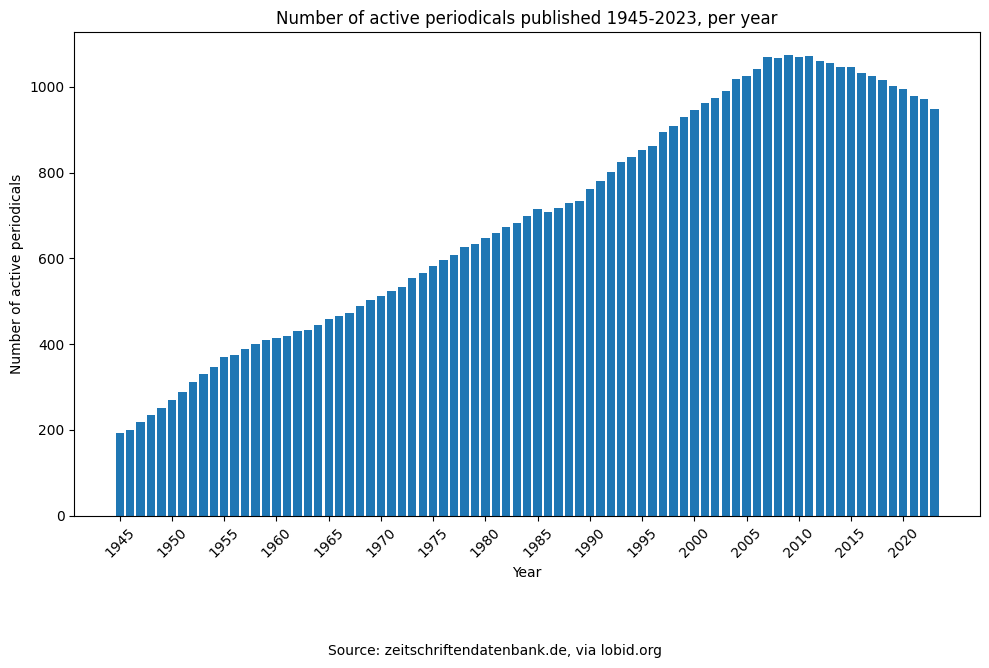

In [4]:
#| label: fig-zdb
#| fig-cap: "Number of active serial publications classified as DDC 340 ('law') and language 'German' in the ZDB, per year, via lobid.org"

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/zdb/zdb-ger-law-issn-1945-2023-years.csv', encoding='utf-8')
plt.figure(figsize=(10, 6))
plt.bar(df['year'], df['number_of_journals'])
plt.xticks(df['year'][df['year'] % 5 == 0], rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of active periodicals')
plt.title('Number of active periodicals published 1945-2023, per year')
plt.figtext(0.5, -0.1, "Source: zeitschriftendatenbank.de, via lobid.org", ha="center", fontsize=10)
plt.tight_layout()
plt.show()

To narrow down this list further would require to find ways to decide, based on metadata, a), which journals are relevant for Germany, and b) which of those are "law journals", i.e. contain legal scholarship rather than just administrative or legislative communications. As the lack of a suitable metadata category meant that we would have had to to identify and test proxy variables--a rather complex matter--, we did not pursue this approach further.

#### Bibliometric Databases: Web of Science, Scopus, OpenAlex

Instead, the next experiment was to probe the bibliometric databases themselves to see whether, based on the available metadata, we could generate a methodologically controlled list of journals. In theory, this could yield a better selection than what we retrieved from the ZDB, since the bibliometric databases aim to focus on research and are less likely to contain non-scholarly communications. The reason for this selection of these three databases (and the exclusion of others, such as Lens, Semantic Scholar or dimension.ai) is that they are available in a normalized schema, at the Kompetenznetzwerk Bibliometrie (Schmidt et al. 2024).[^4]

[^4]: Up until recently, trying to query these bibliometric databases comparatively would have been a major challenge, since the raw data looks very different for WoS, Scopus and OpenAlex. WoS and Scopus raw data comes in XML and is item-centric, meaning meta data on, for example, journals, author and institutions is available, but only as part of the item xml files. In contrast, OpenAlex raw data is provided in JSONL files and organized in entities and relations between them. This means we would have had to write a different query for each data source. However, since the KB bibliometric database store the data in a common, normalized schema, it allows to use the same, or very similar queries to execute against the data sources (The normalized metadata schema cannot be 100% identical because the differences in the source data). It thus provides an extremely efficient infrastructure for comparisons between them.

In order to achieve our goal of creating a list of German law articles, we have to define queries to execute on each data source. In terms of classification each source uses a different system: WoS and Scopus use journal-level classifications, assigned to the item in the XML files, whereas OpenAlex provides an item-specific classification.[^5] Language is item-specific in all three databases.

[^5]: We used the classification system "ASCA (American School Counselor Association) traditional" for WoS and "ASJC (All Science Journal Classification)" for Scopus. OpenAlex comes with its own item-specific hierarchical classification system (from high to low: domain, field, subfield, topic; see https://docs.openalex.org/api-entities/topics). We used the subfield level.

We wanted to find journals which have article items that belong to the "law" category in the respective classification system, and of which the majority of articles are flagged as being in German. The selection criteria we chose was that a journal would be considered part of our sample if at least 10 articles had a subject category: Law **and** if at least 10% were classified as "Law" and "German". We chose to have both restrictions here because there are some exceptional cases of journals with a very low number of articles, which points to gaps or errors in the data. We therefore did not want to include these exceptional cases where a very few German law articles would already fulfil the quota.

Using these criteria, we probed the **Web of Science Core Collection** (we did not have access to WoS' Emerging Sources Citation Index). We found 250 journals which contained articles classified as 'Law'.[^6] However, as @tbl-wos-ger-law shows, only two of those met the threshold of 10%.

[^6]: The query parameters were: Subject Category = 'Law', source type = 'Journal', item type = 'Article', language = 'ger'

In [5]:
#| label: tbl-wos-ger-law
#| tbl-cap: 'Articles in WoS Core Collection categorized "German" and "Law"'

import pandas as pd
version = "202408"
df = pd.read_csv(f'../data/kb_data/{version}/eva_wos_de_law_journals_trivial_search_result_{version}.csv')
df = df[['source_title', 'article_count', 'law_and_de', 'law_and_de_article_share']]
df.columns = ['Journal', 'Number of Articles', 'Number of German Law Articles', 'Share of German Law Articles']
df

,Journal,Number of Articles,Number of German Law Articles,Share of German Law Articles
0,kriminologisches journal,79,74,0.94
1,tijdschrift voor rechtsgeschiedenis-revue d hi...,279,44,0.16


In **Scopus**, running a query with the above parameters produces a list of 23 journals.[^7] The results show a disproportionate frequency of journals with a social science focus (criminology, criminal psychology, sociology of law) or legal history (@tbl-scp-ger-law).[^8] This is not surprising, since journals that publish research on law which uses social scientific methods, such as criminology, tend to gravitate towards an international audience and thus would also try to be included in bibliometric services such as Scopus, although this does not explain why they are not in the Web of Science. However, this set of journal does seem to correspond with the methodological focus of German jurisprudence, which focuses on doctrinal legal research [@germancouncilofscienceandhumanities2012,p 8].

[^7]: Using the following query parameters: ASJC class = 'Law', source type = 'Journal', item type = 'Article', language = 'ger'

[^8]: Plus, the "Lebensmittel-Umschau" (Food Review) also made it into the list.

In [6]:
#| label: tbl-scp-ger-law
#| tbl-cap: 'Articles in Scopus categorized "German" and "Law", sorted by relative frequency'

import pandas as pd
import regex as re
version = "202408"
df = pd.read_csv(f'../data/kb_data/{version}/eva_scp_de_law_journals_trivial_search_result_{version}.csv')
df = df[['source_title', 'article_count', 'law_and_de', 'law_and_de_article_share']]
df['source_title'] = df['source_title'].apply(lambda title: re.sub('[{}"]','',title))
df = df.sort_values('law_and_de_article_share', ascending=False, ignore_index=True)
df.columns = ['Journal', 'Number of Articles', 'Number of German Law Articles', 'Share of German Law Articles']
df

,Journal,Number of Articles,Number of German Law Articles,Share of German Law Articles
0,Kriminalistik,2601,2599,1.00
1,Verwaltung,115,114,0.99
2,Osterreichisches Archiv fur Recht und Religion,168,166,0.99
3,"Forensische Psychiatrie, Psychologie, Kriminol...",523,513,0.98
4,Zeitschrift der Savigny-Stiftung fur Rechtsges...,398,373,0.94
5,Kriminologisches Journal,207,184,0.89
6,Monatsschrift fur Kriminologie und Strafrechts...,323,284,0.88
7,Deutsche Lebensmittel-Rundschau,1739,1478,0.85
8,Zeitschrift der Savigny-Stiftung fur Rechtsges...,603,500,0.83
9,Zeitschrift der Savigny-Stiftung fur Rechtsges...,120,93,0.78


**OpenAlex** is one of the new non-commercial competitors to the WoS and Scopus. In contrast to the very restricted inclusion criteria of those databases,[^9] the successor to "Microsoft Academic Graph" has a much more liberal approach to what to index. This is immediately visible in the result of our query, which returns 323 individual journals.[^10] When checked from the perspective of a domain specialist, the list seems to include quite a number of journals that seem relevant, although the top-20 list (ranked by the share of German law articles) contains both relevant journals as well as some that are very specialized (@tbl-openalex-ger-law).

[^9]: See https://mjl.clarivate.com/collection-list-downloads for the WoS, and <mark>Scopus-inclusion criteria...</mark>

[^10]: In this result set, in 8 cases journals with the same "display_name" attribute appear with 2 different source ids. Since we know that there are no two different journals having the same name, this might be a disambiguation failure or related to a publisher change.

In [7]:
#| label: tbl-openalex-ger-law
#| tbl-cap: 'Articles in OpenAlex categorized "German" and "Law", sorted by relative frequency, top 20'

import pandas as pd
import regex as re
version = "202408"
df = pd.read_csv(f'../data/kb_data/{version}/eva_openalex_de_law_journals_trivial_search_result_{version}.csv')
df = df[['display_name', 'works_count', 'law_and_de', 'law_and_de_article_share']]
df = df.sort_values('law_and_de_article_share', ascending=False, ignore_index=True)
df.columns = ['Journal', 'Number of Articles', 'Number of German Law Articles', 'Share of German Law Articles']
df.head(20)

,Journal,Number of Articles,Number of German Law Articles,Share of German Law Articles
0,Zeitschrift für Beihilfenrecht,253,191,0.75
1,Zeitschrift für Informationsrecht,1963,1403,0.71
2,Jura - Juristische Ausbildung,24,17,0.71
3,Europaische grundrechte zeitschrift,334,236,0.71
4,Computer Und Recht: Forum für die Praxis des R...,2332,1664,0.71
5,Datenschutz und Datensicherheit,20,14,0.70
6,Jus: Juristische Schulung,1487,1030,0.69
7,Schweizerisches Zentralblatt für Staats- und V...,102,69,0.68
8,Europaisches wirtschafts und steuerrecht,382,260,0.68
9,WUW : Wirtschaft und wettbewerb = Concurrence ...,767,517,0.67


In sum, based on the number of results and a intuition backed by domain knowledge, OpenAlex seems to provide a more promising dataset for our purposes. However, the how can we know we are not missing important journals which, for random reasons, have not been indexed in OpenAlex? And even if we knew that all relevant journals were present, we would not know how to create our sample because OpenAlex does not provide a reliable way of determining which journals out of the 300+ journals found are "relevant".[^11]

[^11]: A possible candidate for determining relevance is the number of citations, however, as we will see later, almost no citation data exists for the journals in our list.

### Constructing a gold standard based on domain expertise

The alternative approach is not to start with the available data, but with the knowledge of domain experts. In this case, we need to know how legal scholars or other people with a similar knowledge of the domain (such as law librarians) would construct the set of journals that we are looking for. In contrast to the previous approach, this involves an element of human judgment. However, this seems to be adequate since such a list is not a "fact" comparable to a mathematical set. It is therefore not decisive for our purposes that such a list might be incomplete or that different people might have different opinions about what should be on that list, as long as we have a viable list that represents the "least common denominator" of expert opinions.

In other words, for our purposes we need a "gold standard" list against which the results of our queries can be compared. The nature of a gold standard in evaluation research is that we do not have "ground truth" in the sense of empirically verifiable observations, but a yard stick, or "good enough" data (Versi 1992).

#### Curated lists of law journals available online

The internet offers a number of lists of German law journals. They are curated in the sense as they have been assembled by (usually unnamed) domain experts of varying credentials for pedagogical or other reasons. For the purpose of this article, we scraped the contents of the following lists and converted them into csv data:[^12]

[^12]: The CSV data is available in the \`../data/web_lists\` directory in the article repository.

-   "Karlsruher Juristische Bibliographie, Verzeichnis der für Periodika verwendeten Abkürzungen": a list of journals curated by the publisher Beck[^13], with 561 entries;
-   juris: Verzeichnis der ausgewerteten juristischen Periodika (Aufsätze): This is the list of journals ingested by the commercial legal information platform "Juris" for their database on law journal articles. The Bayrische Staatsbibliothek has a PDF from 2002[^14] which we used to extract a list of 383 entries;
-   OpenJur - Juristische Fachzeitschriften: openJur[^15] is a database for german jurisdiction and legislation operated by openJur gGmbH, a non-profit organization under german law. It provides a list of German law journals with 173 entries;
-   Jura Recherche: The internet page https://jura-recherche.de provides a research interface for law students. Its list has 252 entries.

[^13]: <https://rsw.beck.de/zeitschriften/kjb>

[^14]: Archived at <https://web.archive.org/web/20250219193315/https://www.bsb-muenchen.de/datenb/juris_zsliste.pdf>

[^15]: <https://openjur.de/s/fachzeitschriften.html>

There are many other lists that could be used. The point is here that, counter-intuitively, the examples surveyed here already vary widely in the selection of journals that they contain. This is demonstrated by drawing a 4-set Venn diagrams based on matching the journal abbreviations of the journals in the lists (@fig-intersection-online-lists).

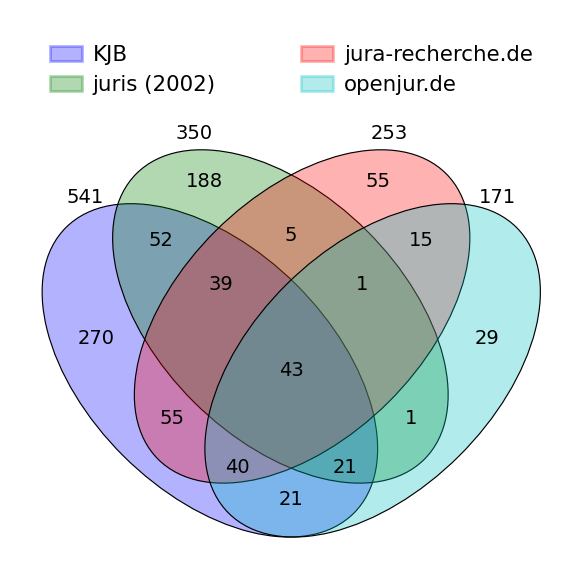

In [8]:
#| label: fig-intersection-online-lists
#| fig-cap: 'Intersection (by abbreviation) of online journal lists'

import pandas as pd 
from venny4py.venny4py import venny4py 

sets = {
    'KJB': '../data/web_lists/karlsruher-juristische-bibliographie-2024-12-13.csv',
    'juris (2002)': '../data/web_lists/juris-ingested-journals-2002.csv',
    'jura-recherche.de': '../data/web_lists/jura-recherche.de-2024-12-13.csv',
    'openjur.de': '../data/web_lists/openjur.de-2024-12-13.csv'
}
abbrevs = {}
for set_name, file_path in sets.items():
    df = pd.read_csv(file_path)
    abbreviations = df['abbreviation'].dropna().str.lower().tolist()
    abbrevs[set_name] = set(segment.lower().strip() for abbrev in abbreviations for segment in abbrev.split(',') if segment.strip())

venny4py(sets=abbrevs, out="tmp")

The lists share a relatively small number of abbreviations (43). The number of found co-occurrences could probably be increased somewhat by matching the entries of the list with unique idenitifiers such as the ISSN, which would eliminate incorrect matchings, but probably not much.

In any case, we did not pursue this approach further. While lists like the ones identified above are interesting data sources themselves, they do not provide a solid basis for our analysis, at least not in a straightforward way. On one hand, the intersection of all lists is hinges on accidental factors since we have no way of knowing what the selection criteria for any of the above lists are. On the other hand, a union of all lists could help avoid selection biases. However, it would have a size that would to large to be useful (\>900), and, as in our previous experiments, there would be no clear selection criteria by which to filter the list down to a more manageable size.

Another option is to check open data sources such as Wikipedia and Wikidata to see if they provide structured metadata. In fact, Wikipedia has a category called "Juristische Fachzeitschrift (Deutschland)" (Journal specialized on legal matters (Germany)[^16], which assembles all Wikipedia pages that self-categorize as a law journal.[^17]. When exporting the category,[^18], the result set contains 286 entries. As this data contains Wikidata QIDs, ISSN matching can be done automatically, which results in a list of 147 journals having an ISSN.

[^16]: <https://de.wikipedia.org/w/index.php?title=Kategorie:Juristische_Fachzeitschrift_(Deutschland)>

[^17]: A WikiData entity for this Wikipedia category exists [(Q8979123)](https://www.wikidata.org/wiki/Q8979123) but as of the time of writing this paper, there were no linked entities.

[^18]: We used https://petscan.wmcloud.org to generate CSV data.

When comparing this list with the KJB and juris lists by abbreviation (@fig-intersection-wikipedia), we again find a relatively small intersection (68 abbreviations) that cannot be caused solely by data errors.[^19]

[^19]: The total number of journals is slightly higher in @fig-intersection-wikipedia because in the source data multiple abbreviations for the same journal exists.

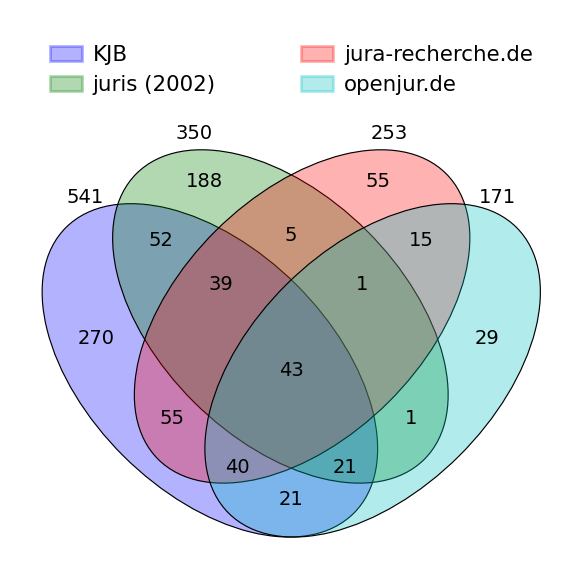

In [9]:
#| label: fig-intersection-wikipedia
#| fig-cap: 'Intersection (by abbreviation) between KJB, juris and Wikipedia entries'

import pandas as pd 
from venny4py.venny4py import venny4py 

sets = {
    'KJB': '../data/web_lists/karlsruher-juristische-bibliographie-2024-12-13.csv',
    'juris (2002)': '../data/web_lists/juris-ingested-journals-2002.csv',
    'jura-recherche.de': '../data/web_lists/jura-recherche.de-2024-12-13.csv',
    'openjur.de': '../data/web_lists/openjur.de-2024-12-13.csv'
}
abbrevs = {}
for set_name, file_path in sets.items():
    df = pd.read_csv(file_path)
    abbreviations = df['abbreviation'].dropna().str.lower().tolist()
    abbrevs[set_name] = set(segment.lower().strip() for abbrev in abbreviations for segment in abbrev.split(',') if segment.strip())

venny4py(sets=abbrevs, out="tmp")

Be that as it may, for our purposes, this list has similar problems as the previous ones: as this list hinges on the accidental fact whether an entry exists on a journal or not, and relies on the self-categorization, its represenativeness cannot be guaranteed. And as before, the data itself does not provide any way of ranking the results to give us the most relevant titles.

#### Expert Ranking: Gröls/Gröls (2009)

Instead, for generating our gold standard, we relied on a 2009 study by Marcel and Tanja Gröls [@gröls2009], who ranked law journals on the basis of a survey among law professors. Even though the study is more than 15 years old and has - as far as we can see - not yet been updated in later studies, it is still a useful source of data for our purposes, as we will explain below.

As the authors point out (<mark>Seite?</mark>), previous attempts at ranking german law journals through empirical means remained scarce. Therefore, the authors decided on a methodological setup derived from similiar studies in economics and business administration. In short, their study consists of different rankings of german law journals generated by surveying the individual assessment of german law scholars. First, 1500 email addresses of german law professors, both current and former, as well as research associates were identified by reviewing the webpages of 45 german universities and academic institutions. Next, these individuals were contacted via email and asked to fill out the survey. 248 responses were received, marking a 16,5% response rate.

The survey asked its participants to name their area of expertise, rank five journals of that area they perceived to be of the highest quality, and additionally, to name and rank five journals that are more general in scope and not bound to a specific subdiscipline, again according to perceived quality. Journals over a certain counting threshold were then assigned scores based on their place in the participants ranking as well as the participants academic status (professors were weighted stronger than research associates) and ‘expert factor’, thus creating two different kinds of rankings: one for journals considered general in nature and several others according to specific subdisciplines.

As this distinction is irrelevant to our purposes, we aggregated the different rankings into one list of 52 journals, thereby constituting our gold standard (@tbl-gold-standard).

In [10]:
#| label: tbl-gold-standard
#| tbl-cap: 'List of 52 most important Law Journals, as ranked by Gröls/Gröls (2009)'

import pandas as pd
df = pd.read_csv("../data/gold/gold-groels-groels-2009.csv")
df = df[['abbreviation', 'title']]
df.columns = ['Abbreviation', 'Title']
df

,Abbreviation,Title
0,AG,Die Aktiengesellschaft
1,VerwArch,Verwaltungsarchiv
2,EuR,Europarecht
3,ZGR,Zeitschrift für Gesellschaftsrecht (Zeitschrif...
4,AVR,Archiv des Volkerrechts
5,ZFA,Zeitschrift für Arbeitsrecht
6,MDR,Monatsschrift für Deutsches Recht
7,KJ,Kritische Justiz
8,JZ,JuristenZeitung
9,BB,Betriebs-Berater


As stated earlier, one possible objection against using the study by Gröls & Gröls for our gold standard is its age. Specifically, there could be the risk of missing relevant journals established after 2009 or not accounting for the fact that more recent rankings would vastly diverge from one fifteen years ago. In fact, for domain experts it seems an obvious problem that journals as e.g. Rechtswissenschaft (est. 2010) or Recht und Zugang (est. 2020), are necessarily not included in our Gold Standard set and thus are not part of our study.

However, we believe that the utility of using Gröls/Gröls data outweighs those objections for two reasons. First, similar to the situation described by Gröls/Gröls in 2009, there is simply not much alternative research to be found that would be more recent and at least equally suited for a gold standard. In other words, having the risk of incomplete data is more favorable than no data at all. Second, we assume the market for german law journals to be a fairly static one, thus deeming it highly likely that a more recent ranking would more or less include the same publications as fifteen years ago, with the exception of the above mentioned journals.

#### Coverage of gold standard journals in other sources

How is the gold standard list derived from the study of Gröls/Gröls (2009) reflected in the other data sources we have surveyed so far?

##### Bibliometric Databases

If we compare the gold standard with the lists we created with a simple[^20] search in the databases Web of Science, Scopus and OpenAlex (@tbl-gold-standard-coverage), we can make the following observations:

[^20]: By "simple" (sometimes also called "trivial" in the code) we mean a search that would be done by someone who knows how to query a bibliometric database but has no domain-specific knowledge about law journals.

-   None of the 2 journals we found in the Web of Science is in the Gröls/Gröls gold standard.
-   Among the 23 journals we found in Scopus, 5 are contained in the gold standard.
-   In Openalex we found 323 journals, 32 of which are contained in the gold standard. The remaining 20 are not contained in OpenAlex at all, which means no other search criteria would have found them.

In [11]:
#| label: tbl-gold-standard-coverage
#| tbl-cap: 'Coverage of Gold Standard Journals in the bibliometric databases'

import pandas as pd
gs_size = pd.read_csv("../data/gold/gold-groels-groels-2009.csv").shape[0]
data = []
for db in ['wos', 'scp', 'openalex']:
    df = pd.read_csv(f"../data/kb_data/202408/eva_{db}_de_law_journals_trivial_search_result_202408.csv")
    hits = df[df['in_goldstandard'] == True].shape[0]
    recall = round(hits/gs_size, 1)
    data.append([db, hits, recall])
df = pd.DataFrame(data, columns=['Database', 'Gold standard journals', 'Recall'])
df

,Database,Gold standard journals,Recall
0,wos,0,0.0
1,scp,5,0.1
2,openalex,32,0.6


Expressed in a more formal metrics, the *recall* of our gold standard against the trivial search[^21] is 0 for WoS, 0.1 for Scopus and 0.6 for OpenAlex. We cannot really compute a *precision* here, which would require some sort way of determining journal relevance. Our search returned journals having the feature "law" and "German", but with no indication of their quality or impact. In contrast, our Gold Standard is based on their perceived 'relevance' among the population of legal scholars in the survey. In standard bibliometric analysis, the 'impact factor' would be derived by measuring the number of references to articles in that journal (citation count). As we show below, this is not really possible because of the lack of reliable citation data. However, at this point of the analysis, we do not take that information into account.

[^21]: We define "recall" in our scenarioas as the share of gold standard journals found by the simple search divided by the total number of gold standard journals.

To find out whether the metadata of the 323 journals in OpenAlex enabled some other form of ranking that would allow to compare the OpenAlex list with our Gold Standard list, we used the following, very simple metrics of each journal in the OpenAlex list: *the number of articles* of indexed, the total *number of citations* of all articles, and the average *number of citations per paper*. We then compared the order of the journals ranked by these metrics with that of the gold standard, with mixed results. <mark>Das folgende braucht eine Tabelle und nochmal eine Überarbeitung</mark>When results show that the pure works count shows a max rank of 299 for a gold standard journal, bad (while the top 5 have ranks 1,2,3,7 and 8 which is good), also both citation based methods provide high ranks for many gold standard journals. Thus, these simple metrics show a stark difference to the ranking of our Gold Standard ranking.

Next, we measured how well the gold standard journals is covered in the bibliometric databases. This question is a somewhat different from the previous as the comparison does not depend on any selection based on metadata in those databases. While the first approach is concerned with the equivalence of common features ("law" , "German"), the second addresses the coverage of these recognized sources within the databases in question. Unsurprisingly, the results confirm our finding that OpenAlex is the only bibliometric database that is worth exploring further. @fig-gold-standard-coverage-visual shows the coverage of our Gold Standard in the Web of Science, Scopus, OpenAlex and CrossRef[^22] that visually makes this clear.

[^22]: CrossRef.org is one of the sources from which OpenAlex draws its data - which can be be seen by the fact that every item from the GS which is contained in CrossRef is also contained in OpenAlex.

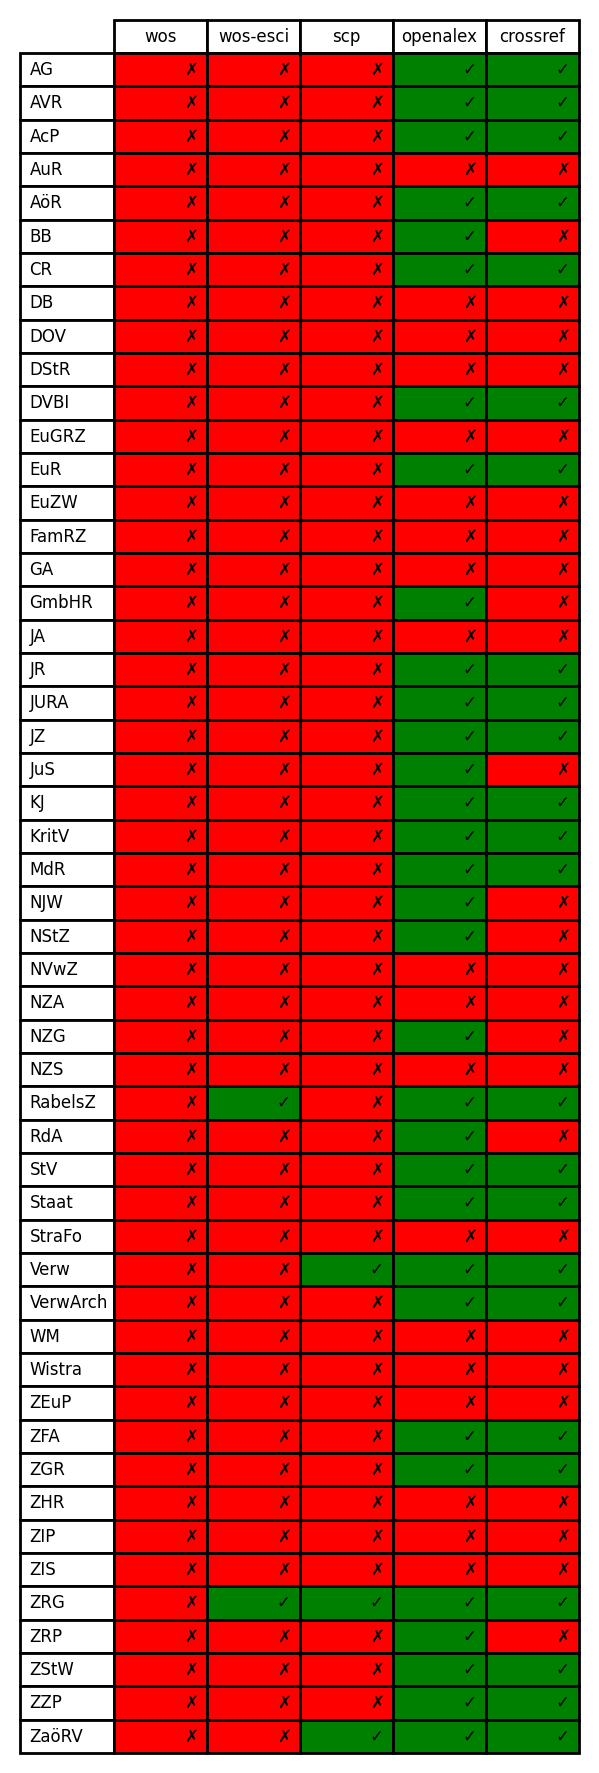

In [12]:
#| label: fig-gold-standard-coverage-visual
#| fig-cap: 'Coverage of the Gold Standard in bibliometric databases'

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

df = pd.read_csv(f'../data/kb_data/unversioned/eva_all_journals.csv')
df = df.sort_values('abk', ascending=True, ignore_index=True)
df = df[["abk","in_wos","in_wos_emerging_sources_index","in_scp","in_openalex","in_crossref"]]
df.replace({True: '✓', False: '✗'}, inplace=True)
df.columns = df.columns.str.replace('in_', '')
df.rename(columns={'wos_emerging_sources_index': 'wos-esci'}, inplace=True)
df.set_index('abk', inplace=True)
df.fillna("", inplace=True)
colors = np.where(df.values=='✓', 'green', np.where(df.values=='✗', 'red', 'white'))
fig, ax = plt.subplots(figsize=(3, 4))
ax.axis('off')
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  rowLabels=df.index,
                  cellColours=colors,
                  loc='center')
plt.show()

##### Internet lists

For completeness, we also checked how well the Gold Standard aligned with the online lists: Matching again on the journal abbreviations (with all the associated problems) we can see the overlaps of the gold standard with those sources in @fig-inclusion-gold-standard-online-lists:

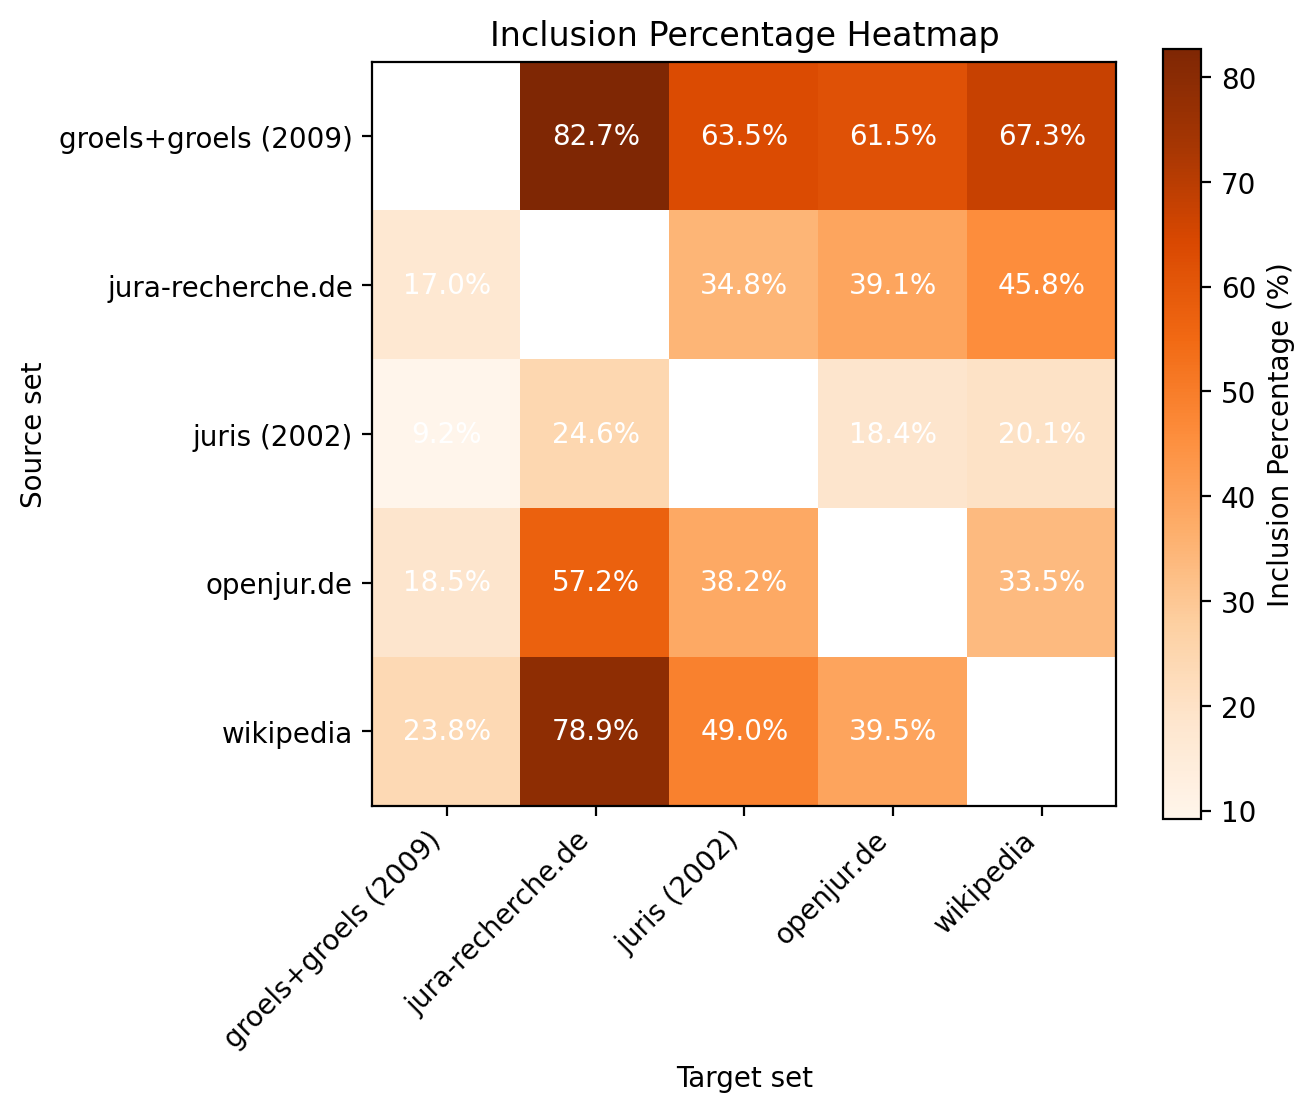

In [13]:
#| label: fig-inclusion-gold-standard-online-lists
#| fig-cap: 'Intersections between the Gold Standard and online lists'

from lib.intersections import compute_csv_intersections, heatmap_inclusion_percentage
data = {
    'groels+groels (2009)': '../data/gold/gold-groels-groels-2009.csv', 
    'jura-recherche.de': '../data/web_lists/jura-recherche.de-2024-12-13.csv',
    'juris (2002)': '../data/web_lists/juris-ingested-journals-2002.csv',
    'openjur.de': '../data/web_lists/openjur.de-2024-12-13.csv',
    'wikipedia': '../data/wikipedia/category-law-journal-germany-with-issn.csv'
}

labels, paths = zip(*data.items())
matrix = compute_csv_intersections(paths, by='abbreviation', lowercase=True, separator=',')
heatmap_inclusion_percentage(matrix, labels=labels, cmap="Oranges", figsize=(6,5))

While one would have expected close to 100% inclusion of our gold dataset in the various lists, this is not the case. The results vary from 61% (openjur.de) to 82% (jura-recherche.de)

<mark>-\>DF: Nochmal nachschauen, was genau fehlt: https://gitlab.mpcdf.mpg.de/cboul/kb-bibliometry/-/tree/main/../data/comparisons</mark>

<mark>Was schließen wir daraus?</mark>

## 4. Coverage on item and metadata level and quality of metadata

As stated above, only one of the three bibliometric databases taken into account seems to cover a sufficient amout of journals considered 'relevant' from experts in the field. For this reason, we concentrate on OpenAlex in the following.

Up to this point, our analysis was restricted to the coverage on journal level, where we found that most of the journals from our gold standard set are covered by OpenAlex. For bibliometric analyses, this coverage on journal level is not sufficient. In addition to the pure existence of the journal in the database, the coverage quality is decicive, which is only given if \* all articles of the journal exist in the database (coverage on article level) \* metadata of articles should be available (coverage on metadata level) in a sufficient quality.

As our journal gold standard set does not help in these respect, a further - item based - gold standard is needed. For this, we contacted a number of publishers of journals in the journal gold standard and asked for their original data. Three publishers provided data, for a total of seven journals:

-   **Mohr Siebeck**: JuristenZeitung, Archiv fur die civilistische Praxis, Rabels Zeitschrift fur ausländisches und internationales Recht, Archiv des öffentlichen Rechts
-   **Duncker & Humblot**: Der Staat
-   **Nomos**: Kritische Justiz, Kritische Vierteljahresschrift

A subset of the available data, limited to publications up to and including the year 2023, was selected for the purpose of evaluating the coverage and metadata quality of the dataset at both the article and metadata levels. Due to incomplete data availability, in particular for older publication years, only the years for which data was available were included in the comparisons.

### 4.1 Item level coverage

#### a. Number of articles per journal (all years)

In a first step we take a look at item level coverage and simply compare the number of publications in OpenAlex with the number of publications in the publisher data. This looks quite promising: numbers are nearly equal (@fig-compare-publisherdata-openalex-work-count).

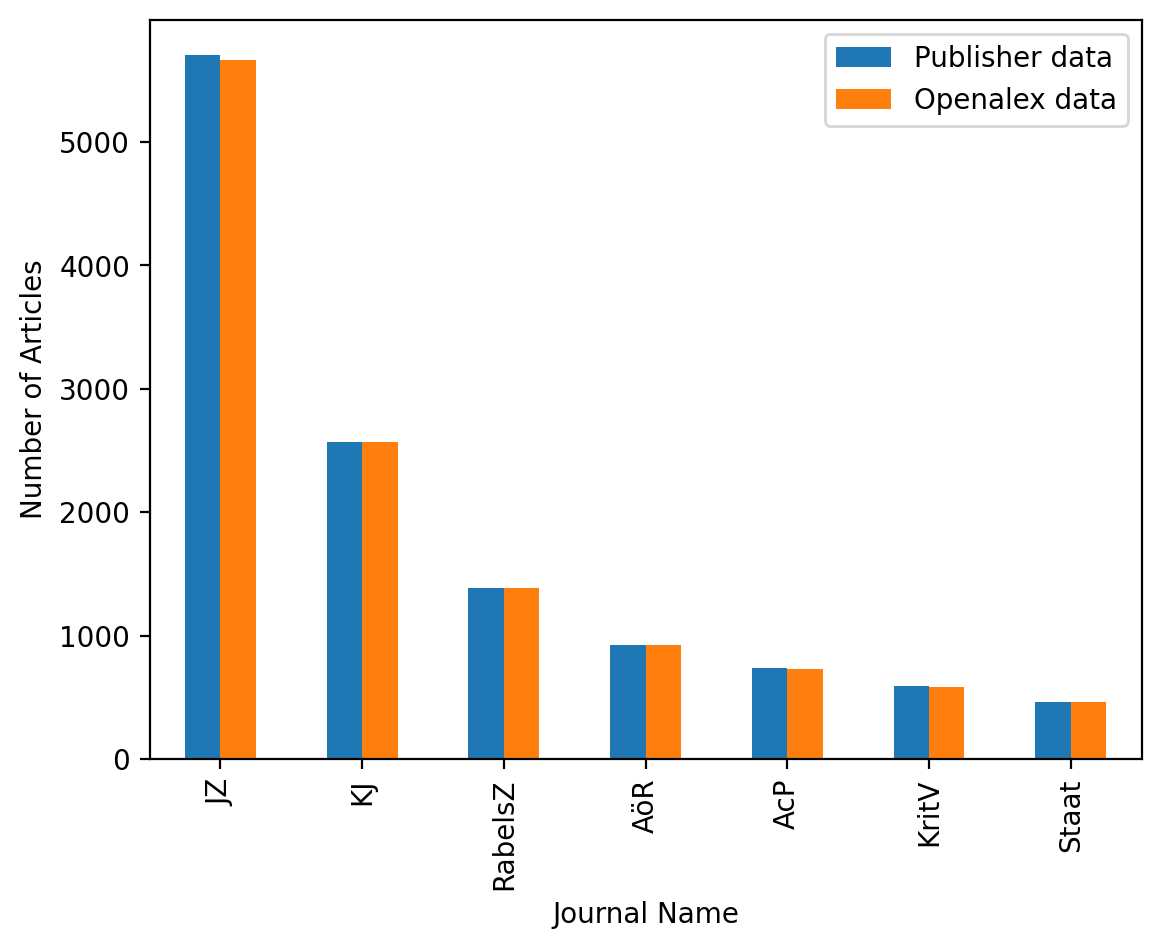

In [14]:
#| label: fig-compare-publisherdata-openalex-work-count
#| fig-cap: 'Comparison of article count between publisher data and OpenAlex'

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/kb_data/202408/eva_all_publisherdata_202408.csv')

# Calculate the counts for each journal and year column
journal_counts_pubyear = df['journal_name'][df['pubyear'].notna()].value_counts()
journal_counts_pubyear_openalex = df['journal_name'][df['pubyear_openalex'].notna()].value_counts()

df_plot = pd.DataFrame({
    'Publisher data': journal_counts_pubyear,
    'Openalex data': journal_counts_pubyear_openalex
})

df_plot.plot(kind='bar', stacked=False)
plt.xlabel('Journal Name')
plt.ylabel('Number of Articles')
plt.show()

#### b. Checking article completeness via DOI matching

Simply having almost equal quantities of articles in either set isn't adequate. It is necessary to ensure that the identical elements exist in both. If this isn't done, some items may be absent in one set and others in another, leading to an equal article count but differing sets. Thus, as a subsequent step, we correlated the articles from OpenAlex against those from publisher data, utilizing the DOI available in both sources. @tbl-compare-publisherdata-openalex-doi shows the number of DOIs which are only found in OpenAlex when categorized by journal with the earliest and the most recent year of missing DOIs. When compared to the overall quantity of articles, these nunbers are neglegible, which means that in terms of the DOI coverage, the data quality in OpenAlex seems good.

In [15]:
#| label: tbl-compare-publisherdata-openalex-doi
#| tbl-cap: 'Comparison of dois between publisher data and OpenAlex'

import pandas as pd
from pandasql import sqldf
version = "202408"

df_items = pd.read_csv(f'../data/kb_data/{version}/eva_all_openalex_items_{version}.csv', low_memory=False)
df_pub = pd.read_csv(f'../data/kb_data/{version}/eva_all_publisherdata_{version}.csv', low_memory=False)

sqldf("""
  SELECT abk as 'Journal', 
    COUNT(*) as 'Missing DOIs', 
    MIN(pubyear) as 'Min year',  
    MAX(pubyear) as 'Max Year' 
  FROM df_items
  WHERE LOWER(doi) NOT IN (SELECT LOWER(doi) FROM df_pub)
  AND abk IN (SELECT journal_name FROM df_pub)
  GROUP BY abk;
""")

,Journal,Missing DOIs,Min year,Max Year
0,AcP,16,1976,2018
1,AöR,2,1993,2008
2,JZ,65,1997,2021
3,KJ,13,2018,2023
4,KritV,10,2023,2023
5,RabelsZ,12,1977,2023
6,Staat,4,1977,2023


Several factors contributed to the observed mismatch between the publisher data and OpenAlex. Not only did the publisher data lack coverage for certain years, but also some newer publications were only present in OpenAlex, highlighting a potential limitation of the publisher data. A closer examination of the discrepancies revealed several distinct cases, including:

-   Temporal discrepancies, where publications were recorded with different publication years in the two datasets (e.g., 2024 in the publisher data vs. 2023 in OpenAlex), leading to publications being excluded from our analysis because of the exclusions mentioned above.

-   Duplicate DOIs in OpenAlex, which appeared to correspond to the same publication, but were not present in the publisher data. This was observed in cases where a single publication had multiple DOIs, such as self-archived versions, corrections, or where one DOIs had been assigned to a whole for a whole journal section (i.e. "book reviews") 0rather than the individual components of a the section (i.e., the individual reviews).

Conversely, a total of 67 DOIs were found to be missing in OpenAlex, as presented in @tbl-openalex-missing-dois. Notably, the number of missing articles was relatively low. However, a closer examination revealed a striking pattern: the majority of missing articles (58 out of 67) were from the publication year 2022. This suggests a potential issue with the timing of data updates in OpenAlex. Specifically, we observed instances where a DOI or item was present in a more recent OpenAlex snapshot, but was missing from an earlier snapshot. For example, the DOI '10.1628/acp-2022-0013' was not present in the August 2024 snapshot, but was included in the November 2024 snapshot. This highlights the importance of considering the timing of data updates when analyzing bibliometric data.

In [16]:
#| label: tbl-openalex-missing-dois
#| tbl-cap: 'Number of DOIs missing in OpenAlex'

import pandas as pd
from pandasql import sqldf
version = "202408"

df_pub = pd.read_csv(f'../data/kb_data/{version}/eva_all_publisherdata_{version}.csv', low_memory=False)

sqldf("""
  select journal_name as 'Journal', 
    count(*) as 'Missing DOIs'   
  from df_pub
  where openalex_id is null 
  group by journal_name;
""")

,Journal,Missing DOIs
0,AcP,7
1,AöR,3
2,JZ,44
3,KJ,1
4,KritV,10
5,RabelsZ,2


#### c. Publication years coverage

As a last analysis concerning article coverage we tried to check how the journal coverage compared to the whole lifetime of a journal. @fig-oa-zdb-coverage-comparison plots the period of the first and last occurrence of OpenAlex data against the period between from the first and last publication year of the journal as stored in the ZDB. Both lines cannot be taken at face value as for simplicity, we have not plotted gaps in publication years or coverage; the graph also does not visualize how much data exists for a journal in a particular year. However, @fig-oa-zdb-coverage-comparison shows very well that only in very few cases, the data in OpenAlex covers the whole lifetime of a journal, and even where there is coverage, it shouldn't be assumed to be complete.

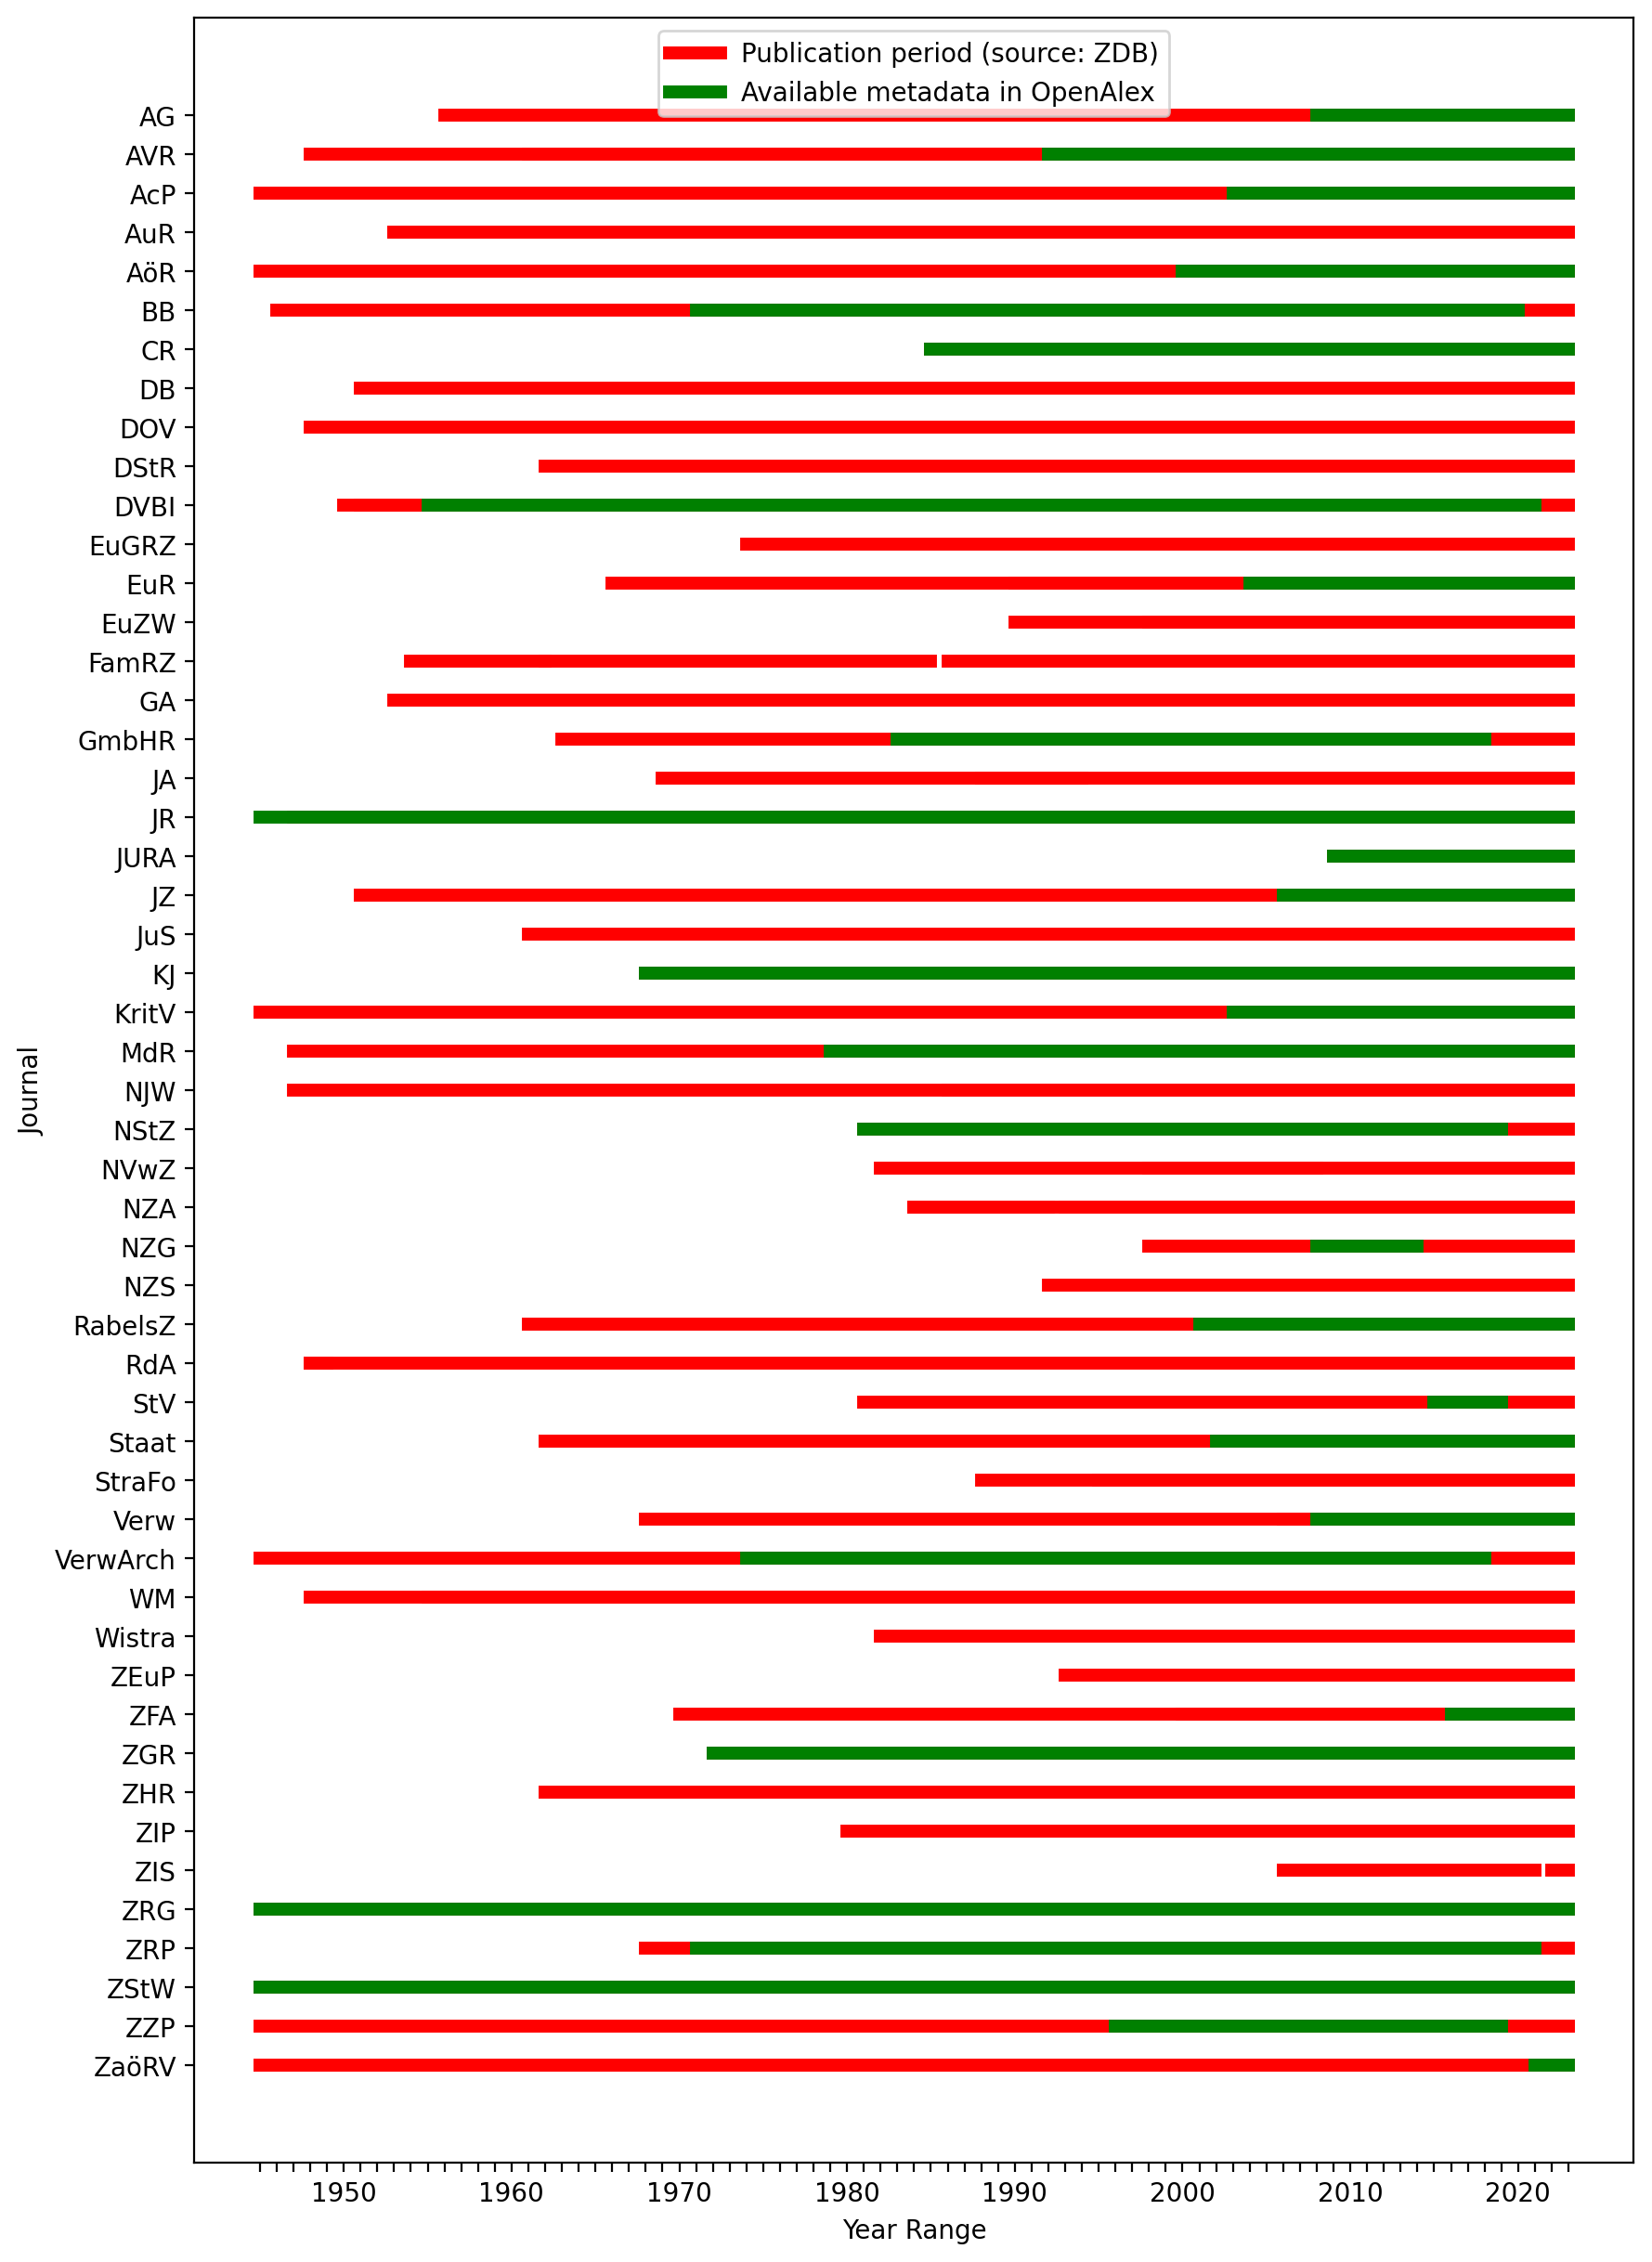

In [17]:
#| label: fig-oa-zdb-coverage-comparison
#| fig-cap: 'Coverage of Gold Standard journals in OpenAlex compared to actual publication periods (simplified).'

import pandas as pd
from lib.visualizations import compare_coverage_kb_zdb
df_kb = pd.read_csv('../data/kb_data/unversioned/eva_all_journals.csv').sort_values(by='abk', ascending=False)
df_zdb = pd.read_csv('../data/zdb/journal_publication_periods.csv')
compare_coverage_kb_zdb(df_kb, df_zdb, min_year=1945, max_year=2023)

### 4.2 Metadata coverage and quality

Article meta data is essential for bibliometric analyses. Time series require valid publication years, analyses of countries or institutions are dependent on good affiliation data, and the construction of a meaningful citation network is impossible without sufficient citation data, i.e. a complete list of the references cited by a publication. In our analysis, we concentrated on four metadata entities which are relevant for bibliometric analyses: publication years, authors, institutions, and citations.

#### a. Publication years

To assess coverage, we first simply check for the presence of a publication year in the OpenAlex data in our dataset. All article items have a publication year. When matching publications by DOI, we found some differences in publication years between OpenAlex and publisher data, as seen in @tbl-cmp-pubyears-oa-publisher. There, a difference of -5 and a number of articles of 12 means that for 12 articles the publication year in OpenAlex is 5 years earlier than the publication year in the publisher data. A difference of 0 means equal publication years in both sources, which is the desired result.

In [21]:
#| label: tbl-cmp-pubyears-oa-publisher
#| tbl-cap: 'Frequency of differences between publication years in OpenAlex and publisher data'

import pandas as pd
from pandasql import sqldf
version = "202408"

eva_all_publisherdata = pd.read_csv(f'../data/kb_data/{version}/eva_all_publisherdata_{version}.csv', low_memory=False)

sqldf("""
select 
    journal_name as 'Jounal', 
    cast(pubyear-pubyear_openalex AS INTEGER) as 'Difference', 
    count(*) as 'Number of Articles'
from eva_all_publisherdata  
where openalex_id is not null
group by  journal_name, pubyear-pubyear_openalex
order by  journal_name, pubyear-pubyear_openalex
""")

,Jounal,Difference,Number of Articles
0,AcP,0,729
1,AöR,0,920
2,JZ,-5,12
3,JZ,0,5650
4,KJ,0,2538
5,KJ,1,33
6,KritV,0,400
7,KritV,1,180
8,RabelsZ,-16,21
9,RabelsZ,-4,22


As shown in Table @tbl-cmp-pubyears-oa-publisher, journals JZ, KJ, KritV, and RabelsZ exhibit discrepancies in publication years, whereas most other cases do not. For JZ and RabelsZ, these differences are rare and typically result from print versions being digitized later. In contrast, KritV shows a distinct pattern, with OpenAlex often reporting a publication year one year later than the publisher data. This phenomenon was previously observed for KritV's last issue across multiple years.

In sum. the publication year metadata in OpenAlex seems to be usable for bibliometric analyses.

#### b. Author count

We then examined the number of authors for all articles in OpenAlex in journals in the gold standard, compared to those in the publisher data. Only 69% of the OA articles (3319 in total) have at least one author, which means that the coverage of author metadata is far from complete. In the publisher data we also have items without authors (3021 in total), but usually this is restricted to items such as the 'Inhaltsverzeichnis' (table of content), 'Redaktionelle Notiz' (editorial), 'Anzeigen' (advertising). It is to expected that such item types do not have authors, although the fact that they have been classified as 'article' in the publisher data as well as OpenAlex data raises some doubts. Equally, the practice of giving the review section one single DOI has to be criticized from a bibliometric perspective, regardless of whether publishers add the authors of the review articles or not. This practice should be given up in favor of registering each book review with its own DOI and separate author.

The differences in the number of authors of the publications in OpenAlex vs in the publisher data gives a first impression about the correctness of this data. @fig-cmp-numauthors-oa-publisher shows how many articles with a specific difference in author numbers occur (where a positive difference means more authors in OpenAlex than publisher data while a negative difference means authors missing in OpenAlex). The x-axis corresponds to the difference, the y-axis the number of articles with this difference. So the ideal case would be all the journals having one only value at x=0, showing for all their articles there is an equal number of authors in OpenAlex and the publisher data. As figure 12 shows we do reach this ideal case but for most cases the number of authors is equal, differences appear only in rare cases (low y values for x values \<\> 0).

Concerning the rest, different cases show up: for the JZ and KJ we have a quite high amount of publications with a small difference (1), while for the KJ and KritV we have very few cases with differences but these differences can be quite high (author count difference of more than 20).

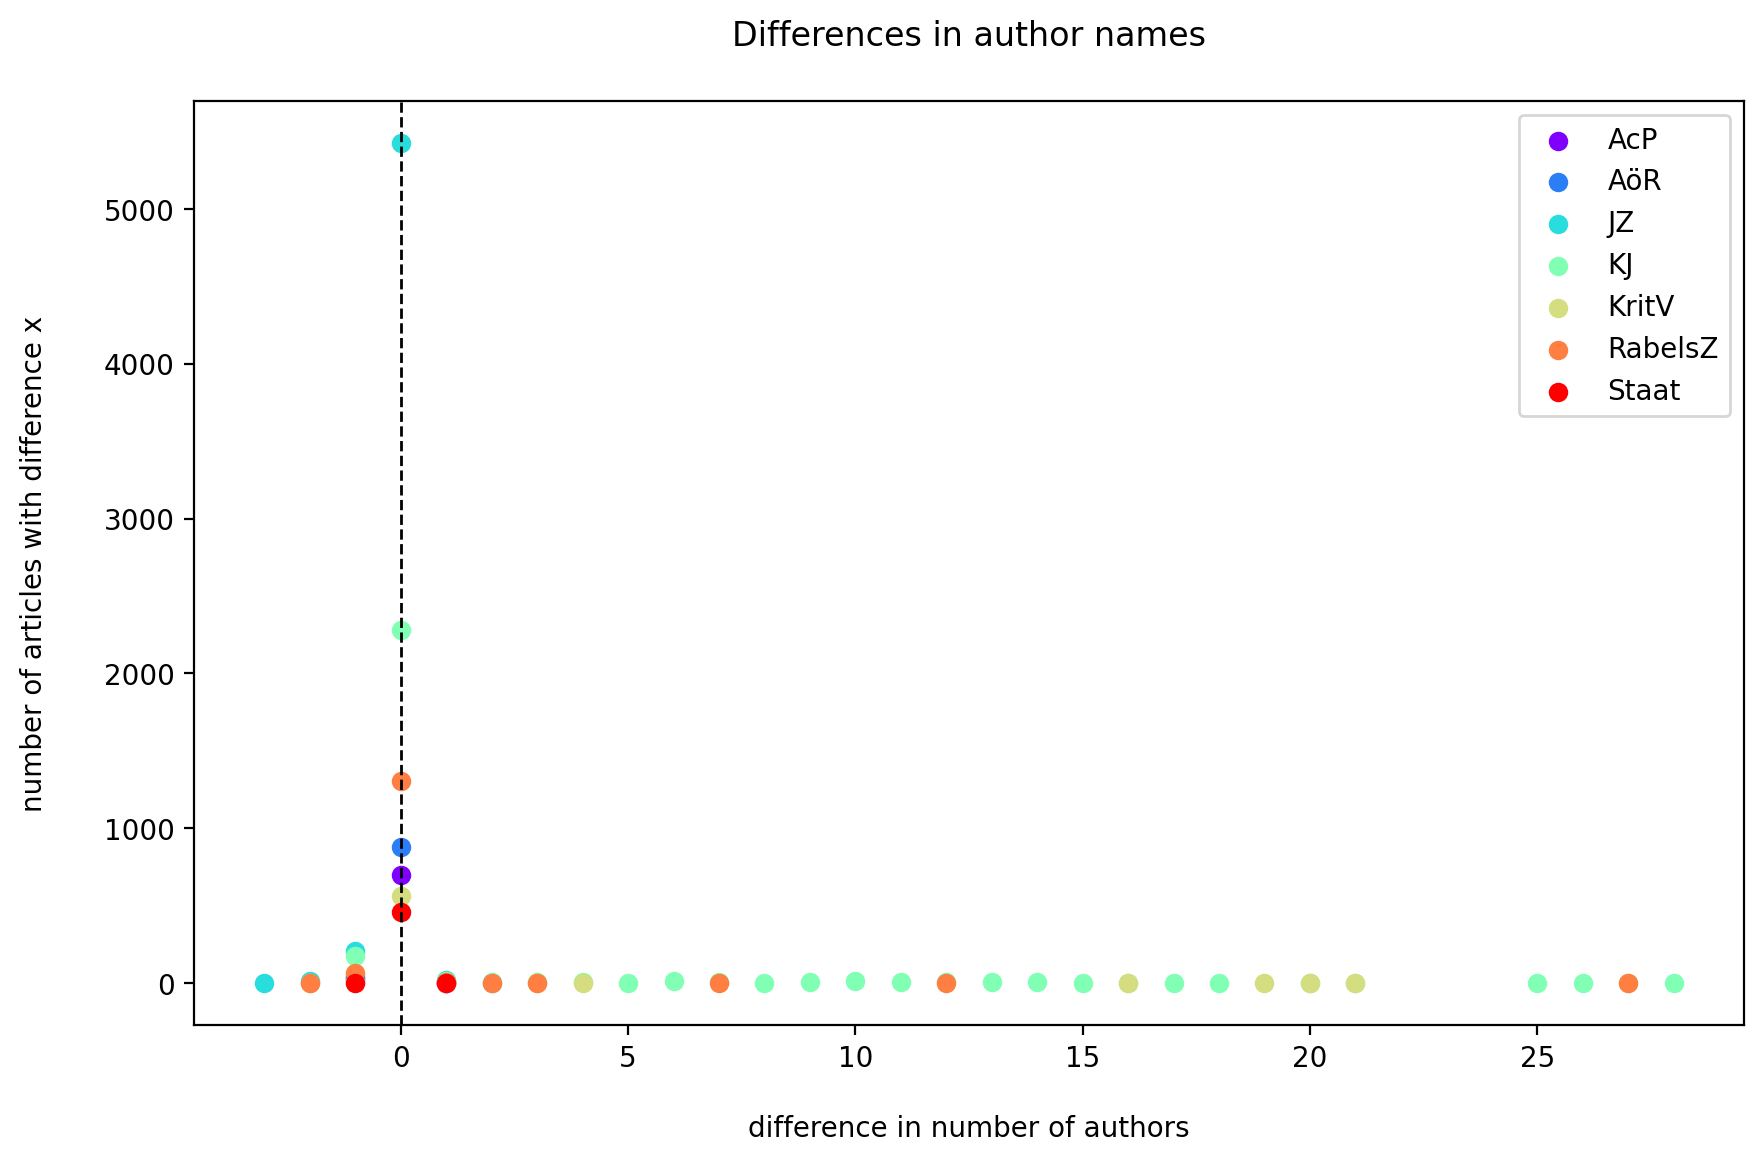

In [22]:
#| label: fig-cmp-numauthors-oa-publisher
#| fig-cap: 'Frequency of differences between the number of authors on the publisher data and OpenAlex'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
version = "202408"

dfx = pd.read_csv(f'../data/kb_data/{version}/eva_author_cnt_comparison_mit_abk_{version}.csv', low_memory=False)

fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.rainbow(np.linspace(0, 1, len(dfx['journal_name'].unique())))
color_dict = dict(zip(dfx['journal_name'].unique(), colors))
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)

for name in dfx['journal_name'].unique():
    data = dfx[dfx['journal_name'] == name]
    ax.scatter(data['diff'], data['num_items'], c=[color_dict[name]], label=name)

ax.set_xlabel('difference in number of authors')
ax.set_ylabel('number of articles with difference x')
ax.set_title('Differences in author names', pad=20)
plt.xlabel('difference in number of authors', labelpad=15)
plt.ylabel('number of articles with difference x', labelpad=20)

ax.legend()
plt.show()

Among the cases where the numbered differed, a closer look showed that, for example,

-   in publications with more than one author, authors were missing in OpenAlex as well as in CrossRef;

-   the entry contained author duplicates in OpenAlex and in CrossRef;

-   Courts, e.g. 'Sozialgericht X' are mentioned as additional author in one source but not in the other; or

-   stark differences could be observed for items with titles such as 'Autor/inn/en', 'Titelei/Inhaltsverzeichnis', 'Buchbesprechungen'.

#### c. Institution/Affiliations

For author affiliations, the publisher data did not provide affiliation information, making it impossible to compare OpenAlex data with publisher data in this regard. We could still perform statistical analyses on the OpenAlex data itself, focusing on articles from journals in the gold standard set. OpenAlex offers two types of affiliation data: the original raw affiliation string, as it appears on the publication, and an institutional ID assigned through OpenAlex's own disambiguation process. Additionally, OpenAlex provides an institution hierarchy, which could be leveraged for further analysis.

However, the fact that only 4% of the publications have at least one institution_id assigned (6% when excluding publications without authors). And even for these few entries, the affiliation data is most probably incomplete as only one affiliation entry is present, interestingly, most of the affiliations available are from an institution of the Max Planck society. There are a few cases in which a raw affiliation string exists, but no \`institution_id \` could be assigned by the disambiguation procedure.[^23] This situation precludes any bibliometric analysis based on affiliation data, effectively rendering evaluations at the institutional level, including comparisons and rankings of institutions, impossible.

[^23]: Examples for cases with uncleaned data show obvious data errors like e.g. 'gegen Brasilien gewonnen haben?' (W4239815844) or affiliation strings like 'studiert Rechtswissenschaft III Frankfurt am Main' (W4249773843).

#### d. References and citations

For references and citations, we face a similar limitation as before: the publisher data does not provide this information, preventing a comparison with the gold standard. Consequently, we can only examine statistical trends within the OpenAlex data itself.

##### References

References are the bibliographic data on the literature cited in a publication. Unfortunately, we observe that only 2.72% of all articles item in OpenAlex that belong to journals in our gold standard set contain data that indicates that they have (at least one) reference. As it is very unlikely that all other articles do not have references at all, the coverage of reference data seems to be extremely low.

In [23]:
#| echo: false
#| output: false

import pandas as pd
import matplotlib.pyplot as plt

version = "202408"

eva_refs_in_openalex = pd.read_csv(f'../data/kb_data/{version}/eva_refs_in_openalex_{version}.csv', low_memory=False)
eva_all_openalex_items = pd.read_csv(f'../data/kb_data/{version}/eva_all_openalex_items_{version}.csv', low_memory=False)

# Get the count of distinct item_id in eva_refs_in_openalex where item_id_cited is not null
cited_items = eva_refs_in_openalex[eva_refs_in_openalex['item_id_cited'].notnull()]['item_id'].nunique()

# Get the count of distinct item_id in eva_all_openalex_items
total_items = eva_all_openalex_items['item_id'].nunique()

# Calculate the percentage
percentage = round(100 * cited_items / total_items, 2)

print(percentage)

2.72


@fig-openalex-refs shows the huge differences between journals:

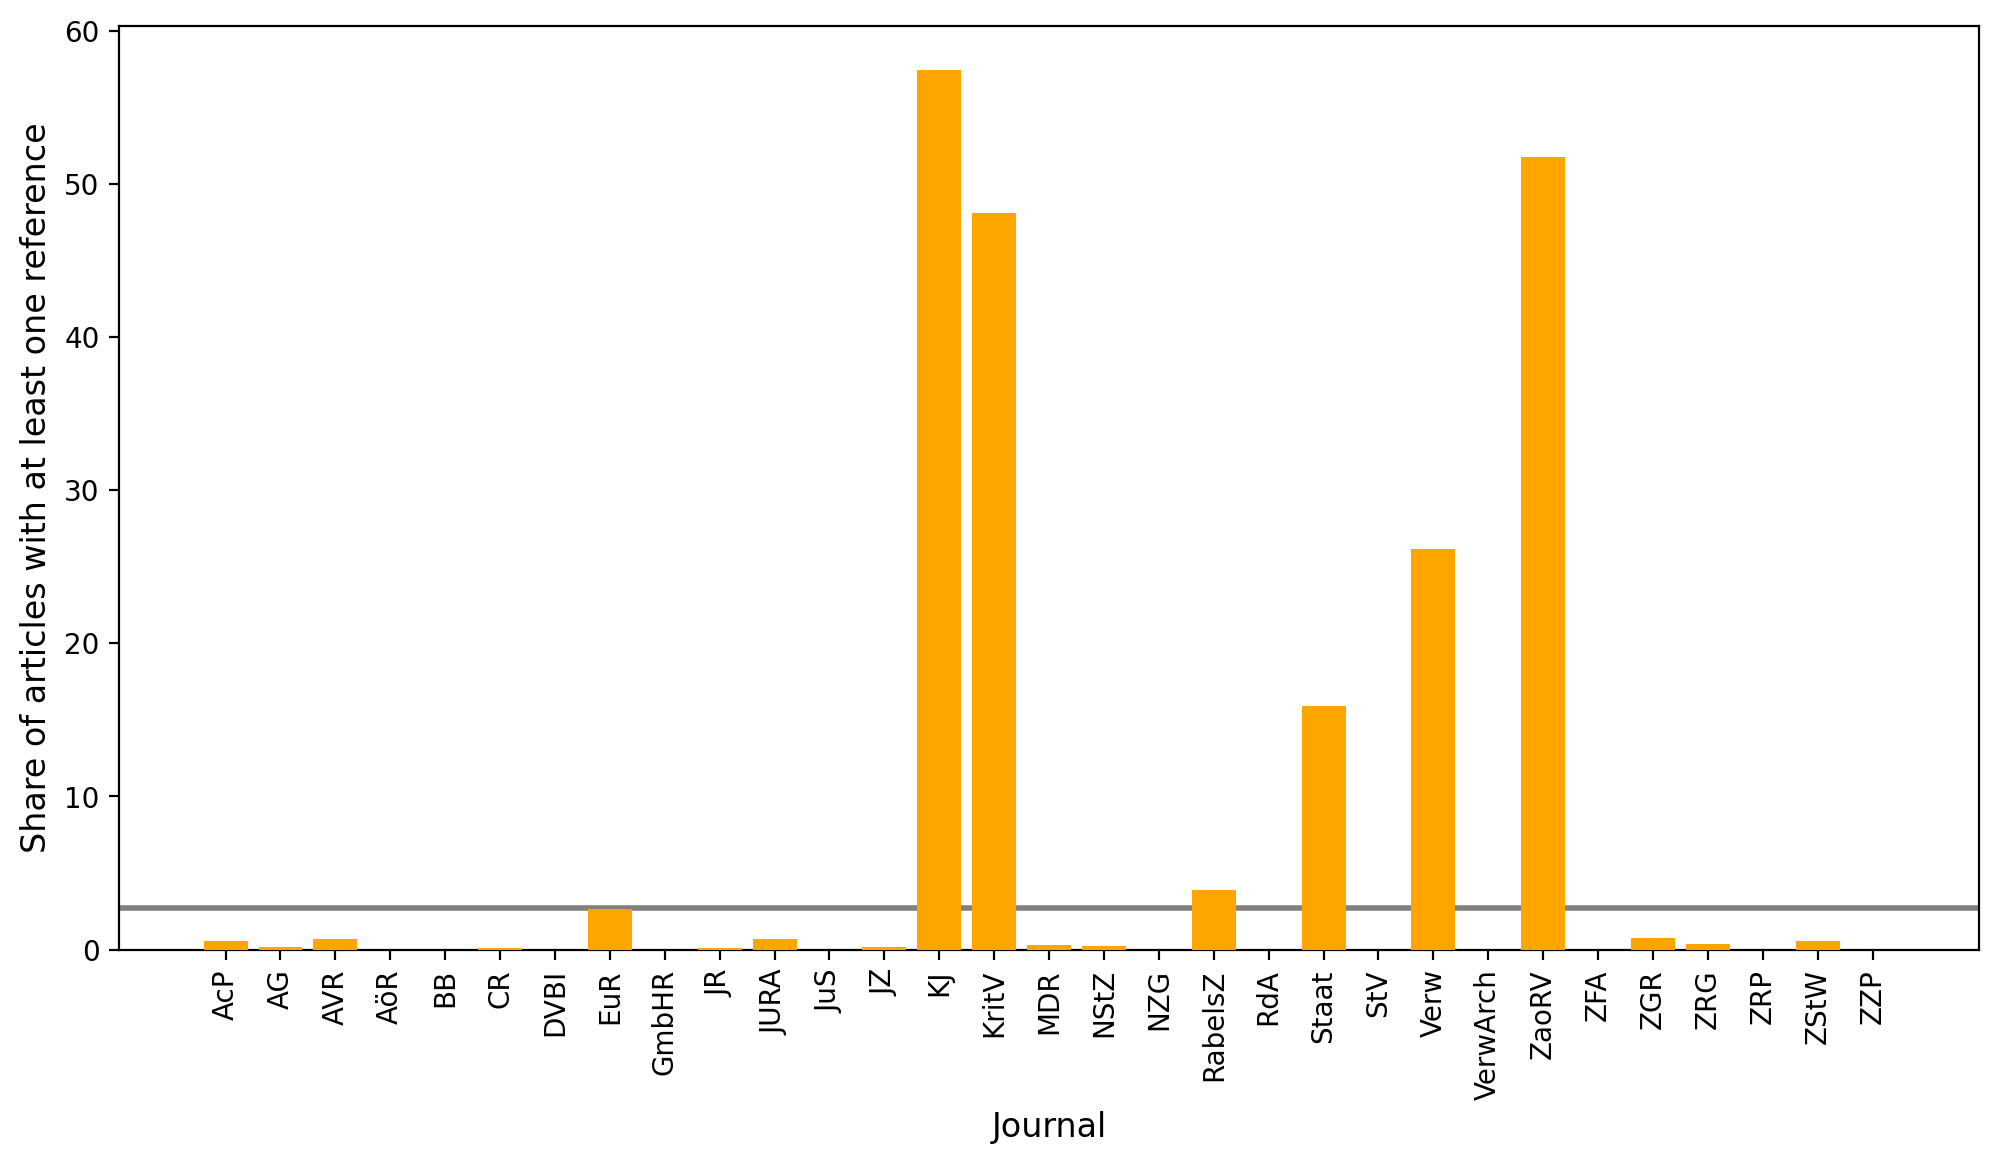

In [39]:
#| label: fig-openalex-refs
#| fig-cap: 'Share of articles with at least one reference per journal in the gold standard set'

import pandas as pd
import matplotlib.pyplot as plt

version = "202408"

eva_refs_in_openalex = pd.read_csv(f'../data/kb_data/{version}/eva_refs_in_openalex_{version}.csv', low_memory=False)
eva_all_openalex_items = pd.read_csv(f'../data/kb_data/{version}/eva_all_openalex_items_{version}.csv', low_memory=False)

# Get the item_id where item_id_cited is not null
cited_items = eva_refs_in_openalex[eva_refs_in_openalex['item_id_cited'].notnull()]['item_id']

# Filter eva_all_openalex_items where item_id is in cited_items and group by abk
with_ref = eva_all_openalex_items[eva_all_openalex_items['item_id'].isin(cited_items)].groupby('abk').size().reset_index(name='with_ref')

# Group eva_all_openalex_items by abk
total = eva_all_openalex_items.groupby('abk').size().reset_index(name='total')

# Merge with_ref and total on abk
df = pd.merge(total, with_ref, on='abk', how='left').fillna(0)
df = df.sort_values(by='abk', key=lambda x: x.str.lower())

# Calculate share_with_ref
df['share_with_ref'] = round(100 * df['with_ref'] / df['total'], 2)

# Plot the data
plt.figure(figsize=(12, 6))
plt.axhline(y=2.72, color='gray', linewidth=2, zorder=0)
bars = plt.bar(df['abk'], df['share_with_ref'], color='orange', zorder=3)
plt.xlabel('Journal', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.ylabel('Share of articles with at least one reference', fontsize=12)
plt.show()

::: callout-important
The original plot from the notebook looks different, i.e. has more entries in a slightly different order and showings journals with zero citations
:::

![](https://pad.gwdg.de/uploads/ccb4017b-6cd9-4004-b587-2cfcd9fd5735.png)

We also had a look at the reference situation with respect to the publication years to see if more actual publications do have a better coverage of references but this is not the case. @tbl-oa-references-statistics shows that 5,097 distinct articles appear as a reference in at least one article of our gold standard set, of which 41.55% are in the gold standard set of journals; 43.24% of them are publications in journals we found by trivial search (german, law) in OpenAlex. However, it must be kept in mind that these figures do not mean much because the reference data is simply to scarce for any kind of robust interpretation.

In [43]:
#| label: tbl-oa-references-statistics
#| tbl-cap: 'Statistics on OpenAlex reference data in the Gold Standard'

import pandas as pd
from pandasql import sqldf

version = "202408"

eva_refs_in_openalex = pd.read_csv(f'../data/kb_data/{version}/eva_refs_in_openalex_{version}.csv', low_memory=False)
eva_all_openalex_items = pd.read_csv(f'../data/kb_data/{version}/eva_all_openalex_items_{version}.csv', low_memory=False)

data = []

cited_items_with_refs = eva_refs_in_openalex[eva_refs_in_openalex['item_id_cited'].notnull()]['item_id'].nunique()
total_items = eva_all_openalex_items['item_id'].nunique()
percentage_items_with_refs = round(100 * cited_items_with_refs / total_items, 2)
data.append(['Percentage of OpenAlex article items in Gold Standard habving at least one reference', percentage_items_with_refs])

data.append(['Distinct publications cited', sqldf("""
  SELECT
    COUNT(DISTINCT item_id_cited)
  FROM eva_refs_in_openalex
  WHERE item_id_cited IS NOT NULL
""").iloc[0, 0]])

data.append(['Cited publications in Gold Standard', sqldf("""
SELECT
  ROUND(1000 *
    (SELECT COUNT(DISTINCT item_id_cited)
     FROM eva_refs_in_openalex
     WHERE item_id_cited IS NOT NULL AND ref_is_also_in_goldstandard IS TRUE) /
    NULLIF((SELECT COUNT(DISTINCT item_id_cited)
            FROM eva_refs_in_openalex
            WHERE item_id_cited IS NOT NULL), 0),
    2) / 10
""").iloc[0, 0]])

data.append(['Cited publications in law/German search', sqldf("""
  select round(1000*
  (select count(distinct item_id_cited) 
  from eva_refs_in_openalex
  where item_id_cited is not null and ref_is_also_german_law is true) /
  (select count(distinct item_id_cited) 
  from eva_refs_in_openalex
  where item_id_cited is not null),2)/10
""").iloc[0, 0]])

pd.DataFrame(data, columns=['Query', 'Result'])

,Query,Result
0,Percentage of OpenAlex article items in Gold S...,2.72
1,Distinct publications cited,5097.00
2,Cited publications in Gold Standard,41.50
3,Cited publications in law/German search,43.20


::: callout-important
The following doesn't make any sense, since the text does not correspond with the code. And why does the type matter? Maybe we skip it for now.
:::

As German legal scholarship is a rather well-defined academic field, we expected that the set of articles in our Gold Standard would mostly cite each other. However, we also looked at references to articles outside the field, which led to the observation that many of those references where not journal articles, but to titles in book series or ebook platforms.

In [ ]:
#| label: tbl-oa-references-type
#| tbl-cap: 'Types of cited references in the gold standard set'

import pandas as pd
from pandasql import sqldf

version = "202408"

# derived by
# select "id","issn_l","issn","display_name", "type"
# from fiz_openalex_rep_20240831_openbib.sources
# where display_name in (
#	  select distinct jorunal_title from project_rewi.eva_citing_items_journals_202408 
# ) 
openalex_citing_items_sources = pd.read_csv(f'../data/kb_data/{version}/openalex_citing_items_sources_{version}.csv', low_memory=False)
eva_citing_items_journals = pd.read_csv(f'../data/kb_data/{version}/eva_citing_items_journals_{version}.csv', low_memory=False)

sqldf("""
  select type, count(*) 
  from openalex_citing_items_sources
  where display_name in (select journal_title from  eva_citing_items_journals) 
  group by type
""")

##### Citation data in OpenAlex

In bibliometrics, citations (so the set of articles that cite a particular publication) are even of more interest than the reference lists themselves. As argued above, we do not have sufficient reference data and cannot derived any kind of conclusions that correspond to the reality of scholarly legal knowledge production. However, it is still interesting to analyze the citation data that does exist. Thus, we queried the OpenAlex data for article items that cite an article from the set of journals in the gold standard, i.e. they contain this article in their reference list. @tbl-oa-citation-statistics shows some general statistics on citations of our Gold Standard set of journals in OpenAlex.

In [45]:
#| label: tbl-oa-citation-statistics
#| tbl-cap: 'Statistics on OpenAlex reference data in the Gold Standard'

import pandas as pd
from pandasql import sqldf

version = "202408"

eva_citations_in_openalex = pd.read_csv(f'../data/kb_data/{version}/eva_citations_in_openalex_{version}.csv', low_memory=False)
eva_all_openalex_items = pd.read_csv(f'../data/kb_data/{version}/eva_all_openalex_items_{version}.csv', low_memory=False)

data = []

data.append(['Share of publications cited', sqldf("""
  select round(10000*
  (select count(distinct item_id) 
  from eva_all_openalex_items eaoi 
  where item_id in (select item_id from eva_citations_in_openalex where item_id_citing is not null))
  /
  (select count(distinct item_id) from eva_all_openalex_items),2)/100
""").iloc[0, 0]])

data.append(['Citing OA items in the gold standard', sqldf("""
  select round(10000*
  (select count(distinct item_id_citing) 
  from eva_citations_in_openalex
  where item_id_citing is not null and citing_item_is_also_in_goldstandard is true)/
  (select count(distinct item_id_citing) 
  from eva_citations_in_openalex
  where item_id_citing is not null),2)/100
""").iloc[0, 0]])

data.append(['Citing OA items in the trivial search', sqldf("""
  select round(10000*
  (select count(distinct item_id_citing) 
  from eva_citations_in_openalex
  where item_id_citing is not null and citing_item_is_also_german_law is true)/
  (select count(distinct item_id_citing) 
  from eva_citations_in_openalex 
  where item_id_citing is not null),2)/100
""").iloc[0, 0]])

pd.DataFrame(data, columns=['Query', 'Result'])

,Query,Result
0,Share of publications cited,18.15
1,Citing OA items in the gold standard,6.09
2,Citing OA items in the trivial search,7.20


About 18% of the articles in the gold standard set have at least one citation in OpenAlex. This is a higher percentage than that of Gold Standard articles having at least one reference, which was below 3 percent. However, as is very unlikely that all the other articles were not cited at all, the coverage of the Gold Standard can be determined to be very poor in terms of citations.

@fig-openalex-citations displays the absolute differences in citation counts between the journals, without accounting for the varying total number of articles per journal, which would be necessary for a normalized comparison.

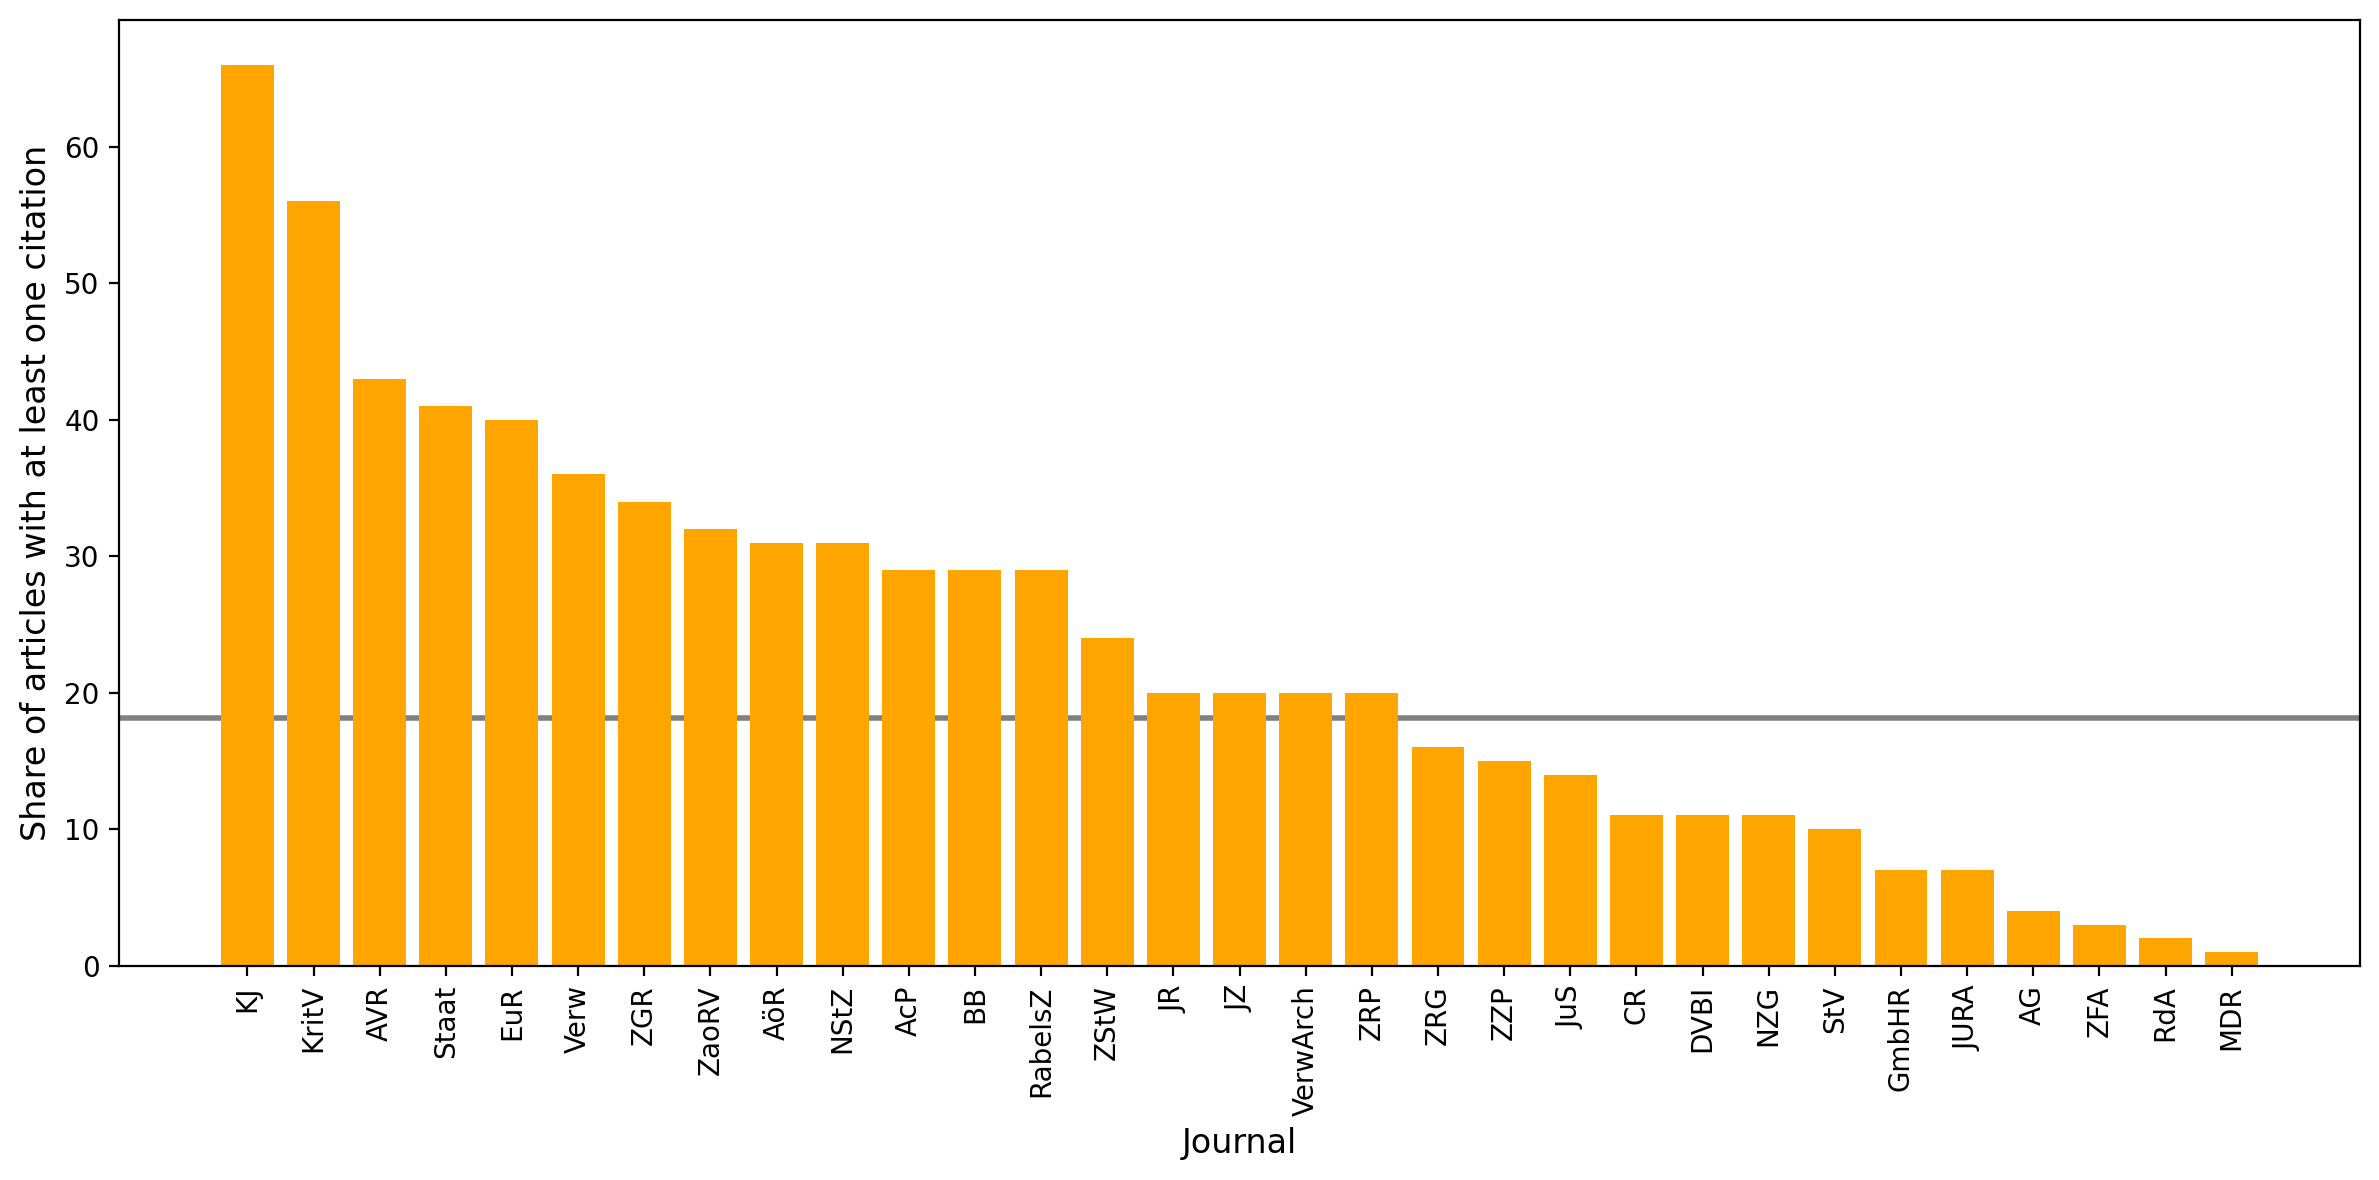

In [46]:
#| label: fig-openalex-citations
#| fig-cap: 'Share of articles with at least one citation per journal in the gold standard set'

import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

version = "202408"

eva_refs_in_openalex = pd.read_csv(f'../data/kb_data/{version}/eva_refs_in_openalex_{version}.csv', low_memory=False)
eva_all_openalex_items = pd.read_csv(f'../data/kb_data/{version}/eva_all_openalex_items_{version}.csv', low_memory=False)

import matplotlib.pyplot as plt

df = sqldf(f'''
  select a.abk, 
    round(100*coalesce(cnt_with_cit,0)/cnt_total,2) as share_with_cit
  from 
    (select abk, count(distinct item_id) as cnt_with_cit
      from eva_all_openalex_items eaoi 
      where item_id in 
        (select item_id from eva_citations_in_openalex where item_id_citing is not null)
      group by abk) a 
  right join (select abk, count(distinct item_id) as cnt_total from  eva_all_openalex_items group by abk) b
  on a.abk=b.abk
  order by round(100*coalesce(cnt_with_cit,0)/cnt_total,2) desc
''')

plt.figure(figsize=(12, 6))
bars = plt.bar(df['abk'], df['share_with_cit'], color='orange')
plt.xlabel('Journal', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.ylabel('Share of articles with at least one citation', fontsize=12)
plt.axhline(y=18.16, color='gray', linewidth=2, zorder=0)
plt.tight_layout()
plt.show()

Only slightly over 6 percent of citing articles are from gold standard journals, and the share is just one percent higher when looking for articles published in journals found by trivial search. In our data, most of the references to articles in our Gold Standard come from outside the field. This is highly counter-intuitive. We know from experience that "in reality", most citations in law journals come from other law journals. However, the observation can be easily explained by the lack of reference data in German legal scholarship demonstrated above. In contrast, interdisciplinary scholarship that cites our Gold Standard journals has a much better coverage in OpenAlex.

##### Scopus Footprint

As argued above, OpenAlex does not tell us much about citations pointing to articles in our gold standard. Although Scopus was not a good source of **article** data in our domain, the database does have a feature that we can use to find some more citations. The Scopus article data contains a column with the full text of the reference, from which we can extract a journal name, even if there is no structured journal name field for this reference. As an experiment, we used the Juristenzeitung (JZ) and searched for its occurrence in the Scopus reference fulltext using regular expressions. While such citations must be considered unrepresentative and random, they are part of all "really existing" citations and can be considered as a lower bound.

@fig-jz-reference-fulltext-comparison shows a comparison between OpenAlex and Scopus in terms of citations to the "Juristenzeitung".

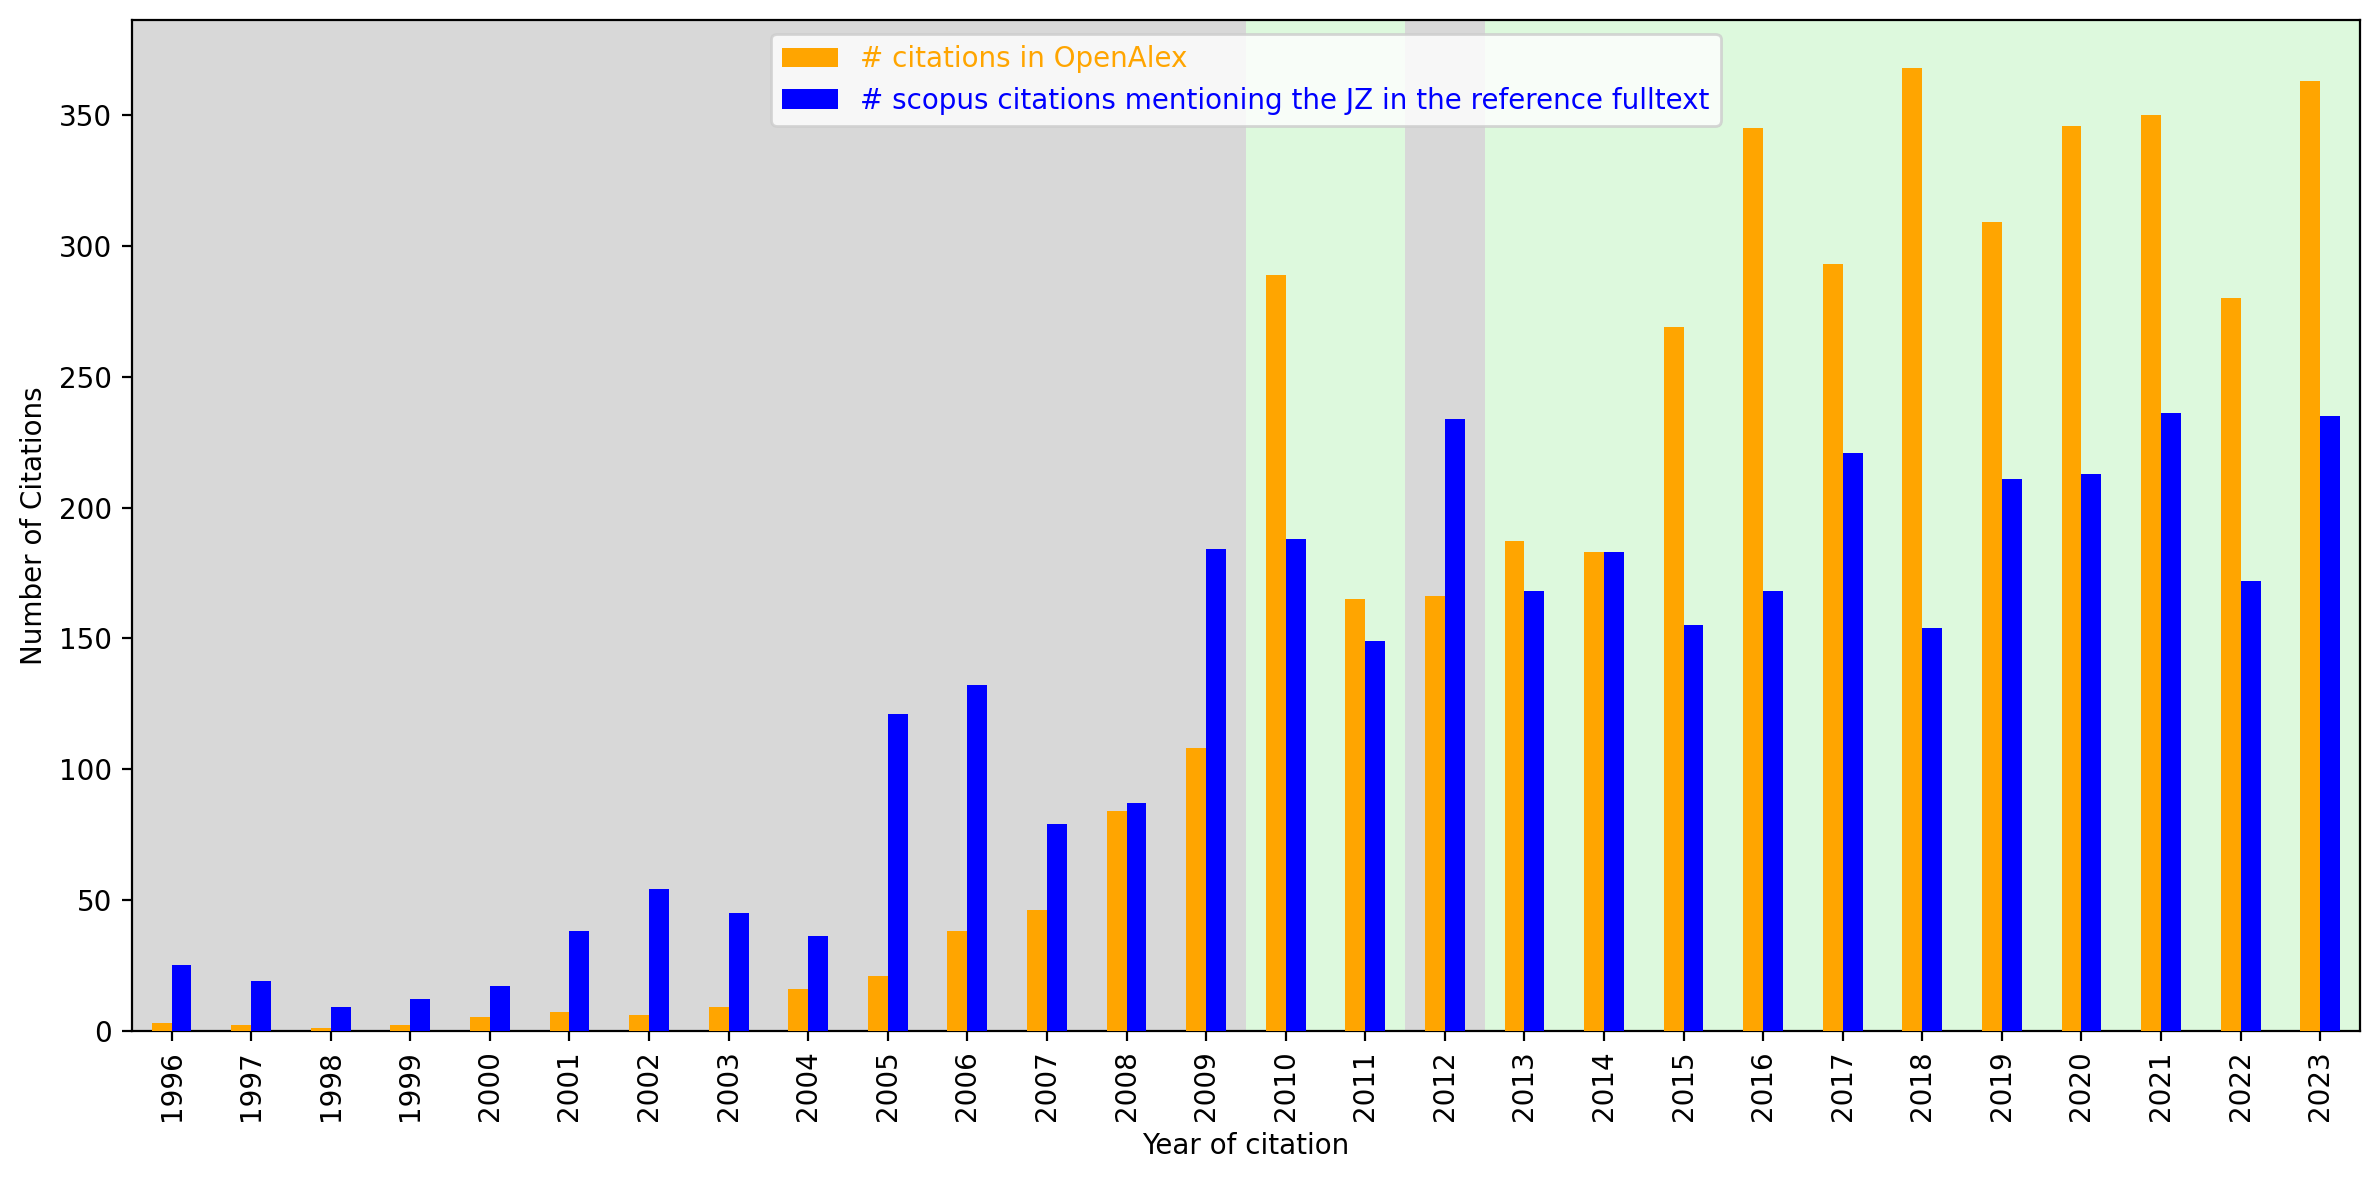

In [47]:
#| label: fig-jz-reference-fulltext-comparison
#| fig-cap: 'Example JZ: Comparison of citations'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf

version = "202408"

eva_citations_in_openalex = pd.read_csv(f'../data/kb_data/{version}/eva_citations_in_openalex_{version}.csv', low_memory=False)
refs_jz = pd.read_csv(f'../data/kb_data/{version}/refs_jz_{version}.csv', low_memory=False)

df = sqldf(f'''
  select 
    openalex_citations.citing_pubyear, 
    cits_openalex, 
    cits_on_jz_scp
  from
    (select 
      citing_pubyear, 
      count(*) as cits_openalex 
    from eva_citations_in_openalex as a
    where item_id_citing is not null and abk='JZ' 
    group by citing_pubyear 
    order by citing_pubyear) as openalex_citations
  join 
    (select 
      citing_pubyear, 
      count(*) as cits_on_jz_scp
    from refs_jz 
    group by citing_pubyear 
    order by citing_pubyear) as cit_from_scopus 
  on openalex_citations.citing_pubyear = cit_from_scopus.citing_pubyear 
  where openalex_citations.citing_pubyear <= 2023
  order by openalex_citations.citing_pubyear asc
''')

df['citing_pubyear'] = df['citing_pubyear'].astype(int)

# plot chart
color_openalex = 'orange'
color_scopus = 'blue'
fig, ax = plt.subplots(figsize=(12, 6))
for i, (index, row) in enumerate(df.iterrows()):
    if row['cits_openalex'] >= row['cits_on_jz_scp']:
        ax.axvspan(i-0.5, i+0.5, facecolor='lightgreen', alpha=0.3, zorder=0)
    else:
        ax.axvspan(i-0.5, i+0.5, facecolor='grey', alpha=0.3, zorder=0)
bars = df.plot.bar(x='citing_pubyear', y=['cits_openalex', 'cits_on_jz_scp'], 
                   color=[color_openalex, color_scopus], ax=ax, zorder=3)
legend_labels = ['# citations in OpenAlex', '# scopus citations mentioning the JZ in the reference fulltext']
plt.legend(bars.containers, legend_labels, labelcolor=[color_openalex, color_scopus])
plt.xlabel('Year of citation')
plt.ylabel('Number of Citations')
plt.tight_layout()
plt.show()

::: callout-important
-   Bitte mit der Originalgrafik vergleichen :: : ![](https://pad.gwdg.de/uploads/f45dd561-6542-4a11-85fa-79977d4b7c3b.png){width="540"}
:::

As noted, a lower bound for the number of citations to JZ's articles is established by the number of references mentioning JZ in the full-text reference string in Scopus. The chart indicates instances where the number of OpenAlex citations falls short of this lower bound (grey background), whereas green background denotes cases where OpenAlex citations exceed the lower bound. Notably, the analysis suggests that OpenAlex's coverage of JZ's citations improves significantly from around 2010/2013 onwards. In contrast, for earlier years, despite a relatively low number of Scopus references mentioning JZ, OpenAlex citations fail to reach the established lower bound.

### 4.3 Classification in Openalex

OpenAlex provides a hierarchical classification (domain, field, subfield, topic)[^24]. For our trivial search, list we used the subfield level (with value 'law'). The fact that all journals from the gold standard were contained in the result list seems to suggest that the classification matches our expectations.

[^24]: See <https://docs.openalex.org/api-entities/topics/topic-object> (Last accessed Mar 9 2025)

To further investigate the classification scheme, we focused on the level below subfields, namely topics. For articles from journals in our gold standard set, we would expect to see subfields of law represented. Using an open classification algorithm,[^25] OpenAlex assigns multiple topics to each article, along with a likelihood score. The works object in OpenAlex contains a keyword attribute, which is populated with up to 5 keywords derived from the topics, taking into account a threshold for likelihood. In order to get a first glance of the topics used, we generated a word cloud of these keywords. The resulting cloud contains sensible and relevant topics for our set.

[^25]: <https://github.com/ourresearch/openalex-topic-classification> (Last accessed Mar 9 2025)

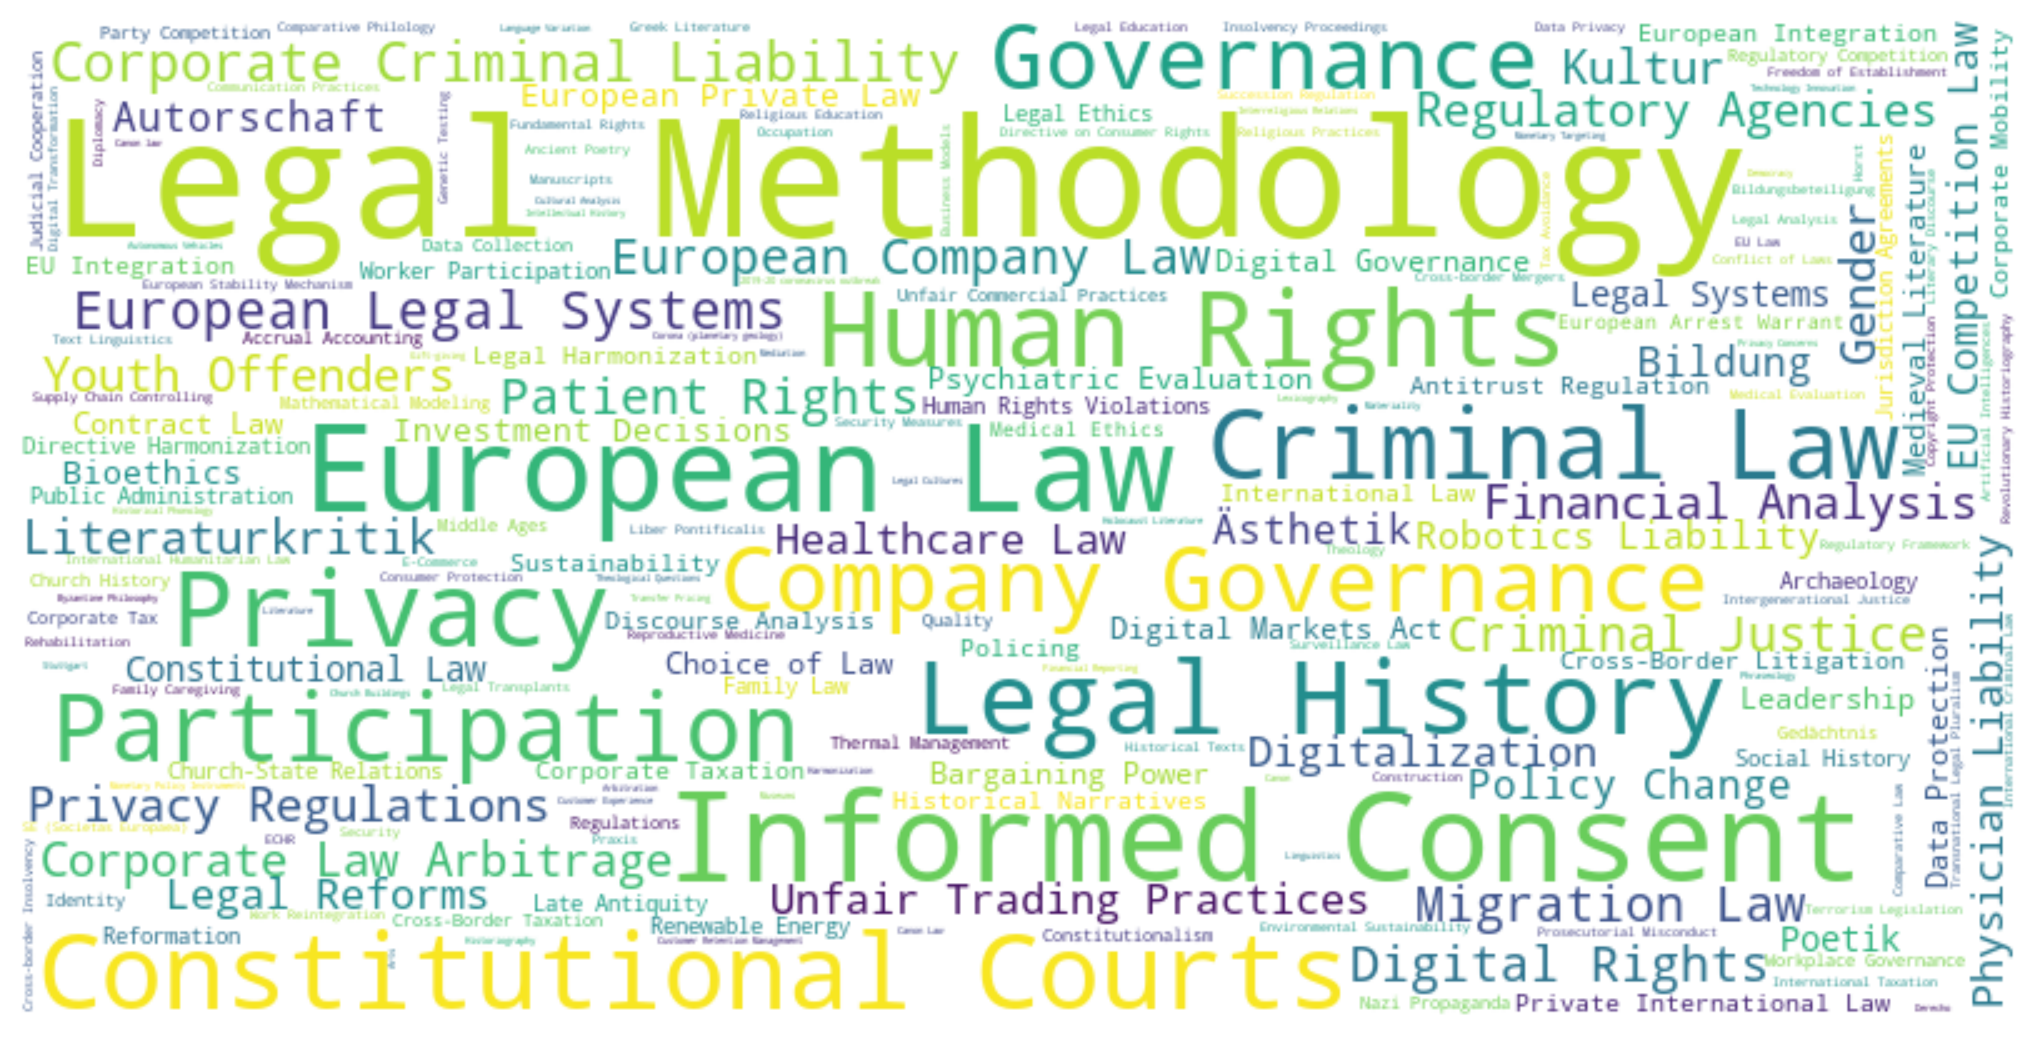

In [48]:
#| label: fig-wordcloud-oa-topics
#| fig-cap: 'Example JZ: Comparison of citations'

from wordcloud import WordCloud
import matplotlib.pyplot as plt

version = "202408"

df = pd.read_csv(f'../data/kb_data/{version}/eva_keywords_for_articles_in_goldstandard_{version}.csv', low_memory=False)
word_freq = dict(zip(df['keyword'], df['item_cnt']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

However, without a more thorough analysis, we cannot say whether the keywords actually fit the content of the articles. This would require a new gold standard on the article level and a reliable way of comparing human-curated (German) keyword with the ones generated by OpenAlex.

### 4.4 The futility of ranking with OpenAlex

The last metric we want to have a look at is a ranking of journals based on the available data in our gold standard. If we assume that the expert assessment is the best data we have, what can we draw on in OpenAlex that could be compared to it? The typical metric that is used in the traditional bibliometric databases is the Journal Impact Factor (JIF)[@garfield1999], which despite being heavily criticized [@archambault2009], is still widely used. Calculating the JIF for the gold standard journals in OpenAlex is problematic since we are lacking data for many years. Also the question is for what year to compare it - since the gold standard is from 2009, it would make sense to compare the JIF only for 2009. However, given that a) as we have argued before, the German legal landscape is very static and b) there is very little data to rely on, it made sense to calculate the JIF over all available data. Our aim is not an exact comparison but rather meant to give a sense of how much the OpenAlex ranking differs from the gold standard one.

We compared the Gröls/Gröls ranking with the JIF-based ranking from OpenAlex separatedly for the generalist journals (@fig-comp-groels-jif-general) and the specialized ones (@fig-comp-groels-jif-specialized). Looking at the results, the rankings differ considerably.

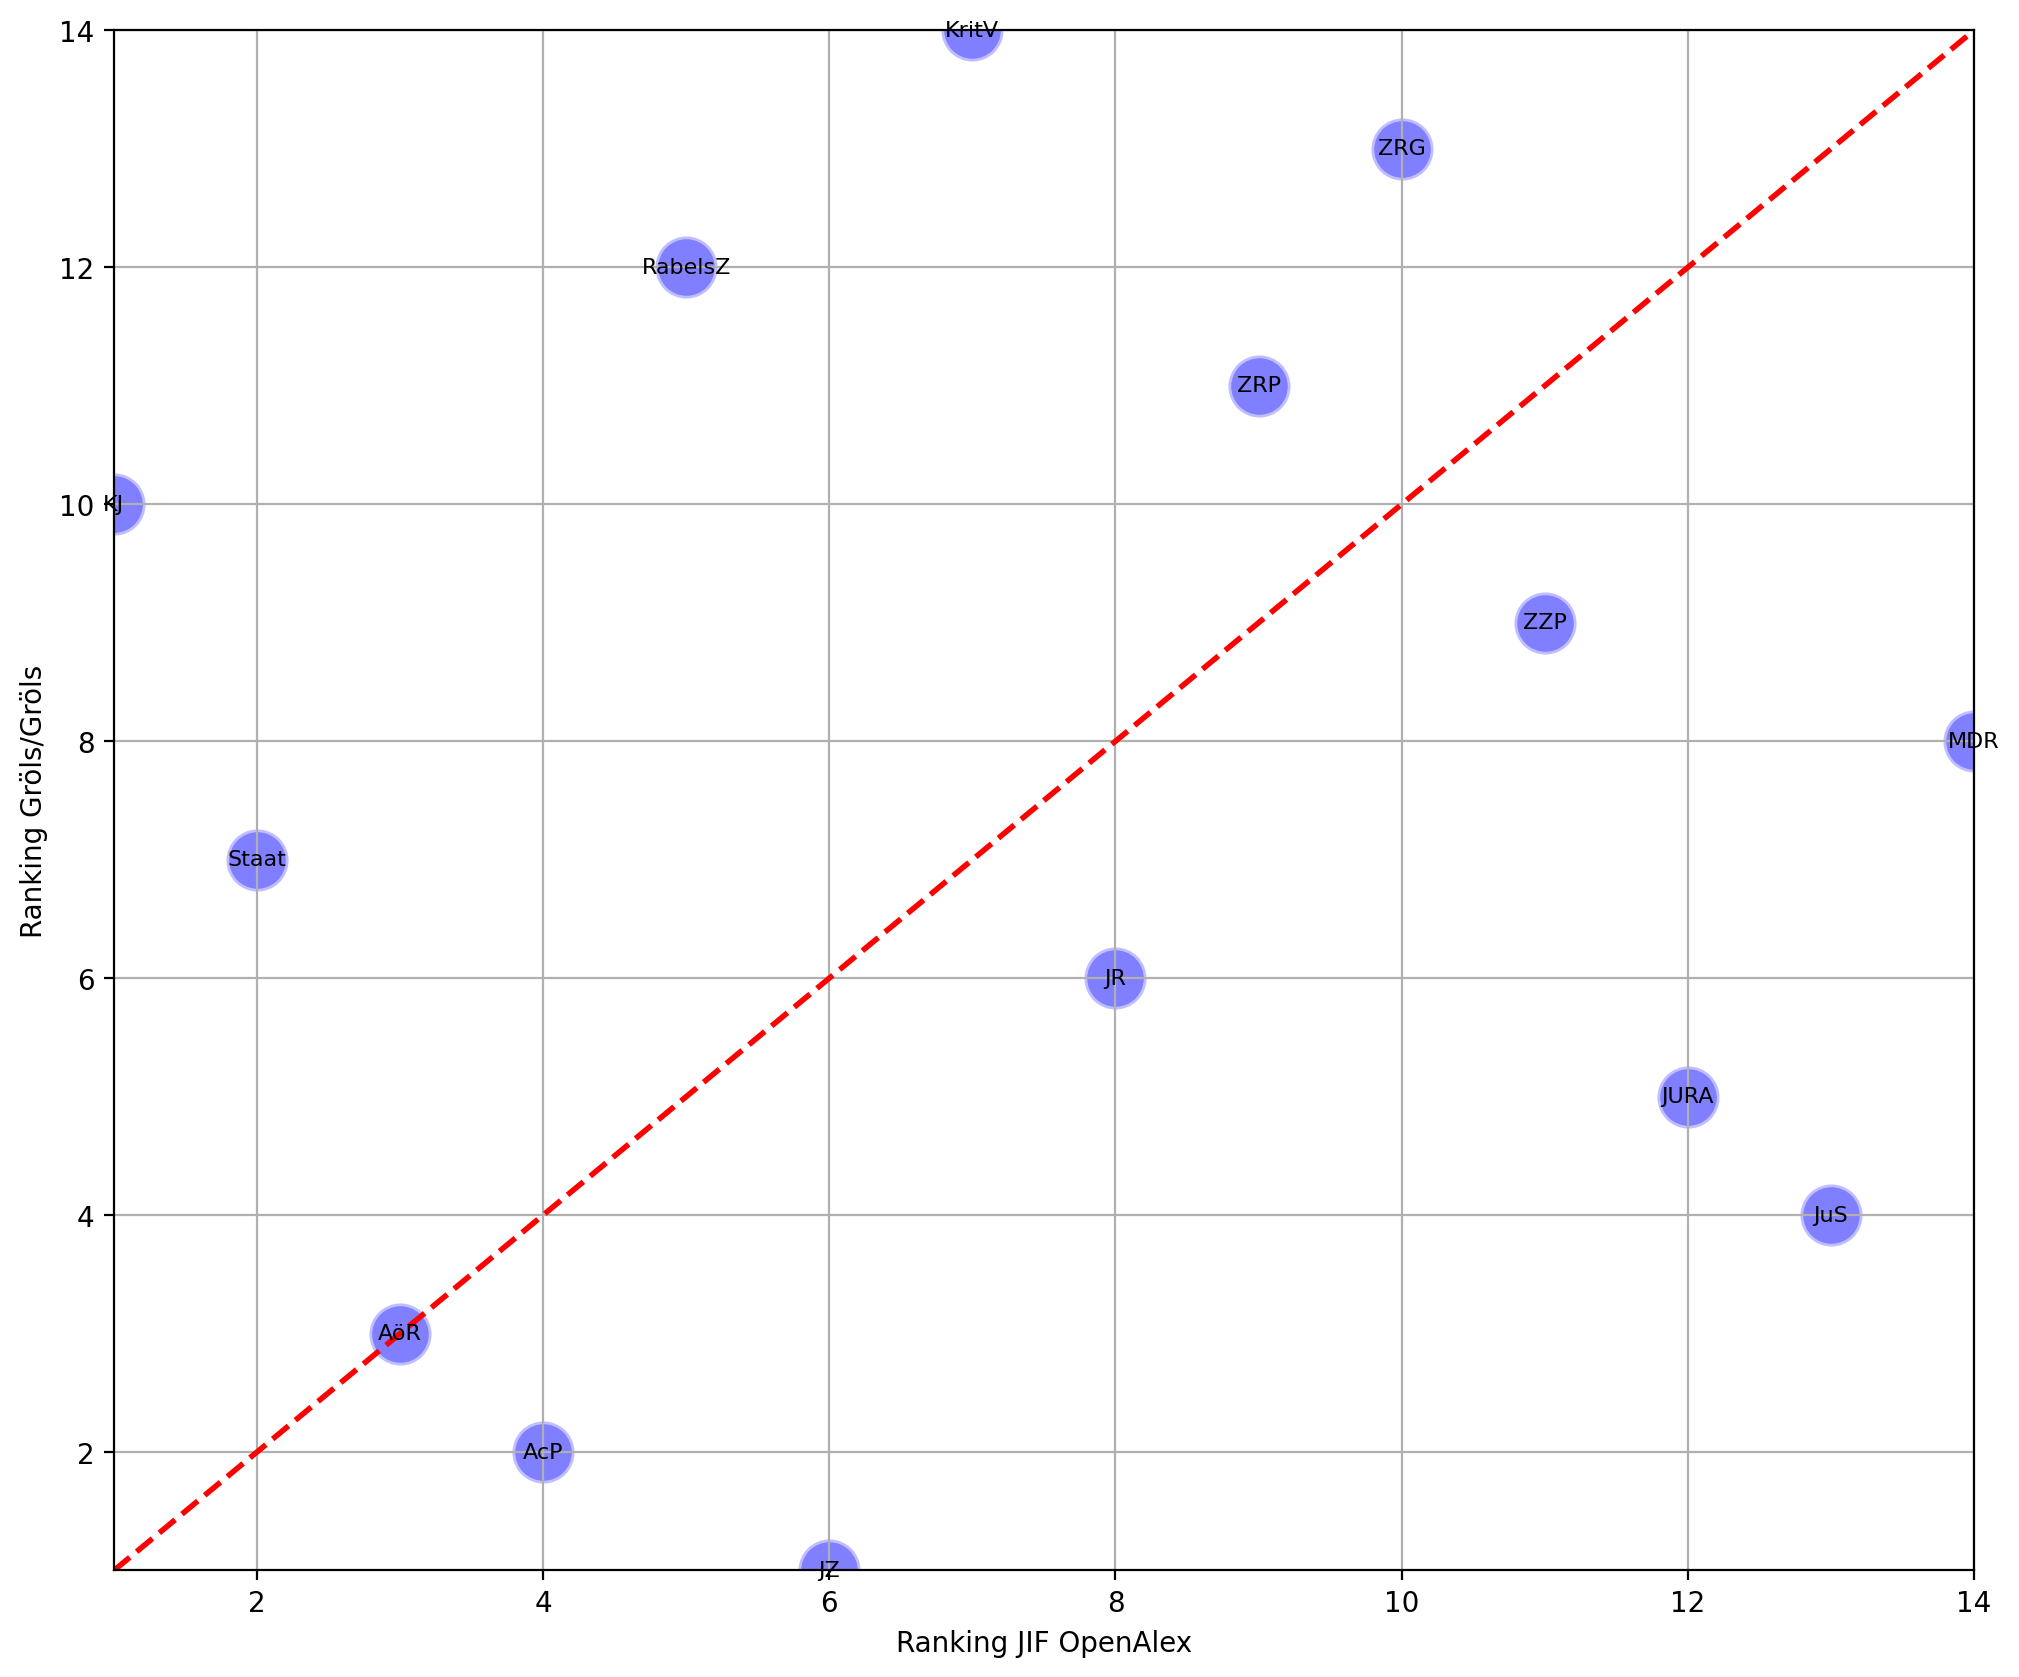

In [49]:
#| label: fig-comp-groels-jif-general
#| fig-cap: 'Comparison of Gröls/Gröls ranking with OpenAlex JIF for generalist journals'

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from lib.visualizations import compare_rankings

version = "202408"

eva_journal_impact_factors = pd.read_csv(f'../data/kb_data/{version}/eva_journal_impact_factors_{version}.csv', low_memory=False)

eva_all_journals = pd.read_csv(f'../data/kb_data/{version}/eva_all_journals_{version}.csv', low_memory=False)

query = f'''
  WITH 
  groels_qual_gew AS (
    SELECT 
      abk,
      qualitaet_gewichtet,
      ROW_NUMBER() OVER (ORDER BY qualitaet_gewichtet DESC) AS ranking
    FROM jura_groels_tabelle
  ),
  journal_impact_factors AS (
    SELECT 
      abk,
      ROUND(AVG(journal_impact_factor), 2) AS mean_journal_impact_factor
    FROM 
      eva_journal_impact_factors
    GROUP BY 
      abk
  ),
  combined AS (
    SELECT 
      a.abk,
      jif.mean_journal_impact_factor AS oa_jif,
      b.qualitaet_gewichtet AS gr_qual_gew,
      gqg.ranking as gr_ranking
    FROM 
      eva_all_journals a
    JOIN 
      jura_groels_tabelle b ON a.abk = b.abk
    JOIN 
      journal_impact_factors jif ON a.abk = jif.abk
    JOIN 
      groels_qual_gew gqg ON a.abk = gqg.abk
  )
  SELECT 
    abk,
    oa_jif,
    ROW_NUMBER() OVER (ORDER BY oa_jif DESC) AS ranking_a,
    gr_qual_gew,
    ROW_NUMBER() OVER (ORDER BY gr_ranking) AS ranking_b
  FROM 
    combined
  ORDER BY 
    ranking_a;
'''

# general journals
jura_groels_tabelle = pd.read_csv(f'../data/gold/jura_groels_tabelle1_allg_zeitschriften.csv', low_memory=False)
compare_rankings(sqldf(query), label_ranking_a='Ranking JIF OpenAlex', label_ranking_b='Ranking Gröls/Gröls')

In [ ]:
#| label: fig-comp-groels-jif-specialized
#| fig-cap: 'Comparison of Gröls/Gröls ranking with OpenAlex JIF for specialized journals'

# specialized journals
jura_groels_tabelle = pd.read_csv(f'../data/gold/jura_groels_tabelle2_fachspez_zeitschriften.csv', low_memory=False)
compare_rankings(sqldf(query), label_ranking_a='Ranking JIF OpenAlex', label_ranking_b='Ranking Gröls/Gröls')

::: callout-important
Die Beschreibung stimmt nicht mehr und das Ergebnis scheint auch leicht unterschiedlich zu sein - vielleicht unterschiedliche Version? -\> CB checken
:::

A complete alignment in ranking would have all journals be on the red diagonal line; the closer the dots are placed towards the diagonal, the more the rankings would resemble each other. However, as the figures show, there is large variation in the rankings. For the generalist journals, expert assessment and OpenAlex JIF most closely aligns for only three journals (AcP, AöR, ZZP). For the specialized ones, the spread is even more pronounced, with three journals (Staat, ZStW and ZFA) closest to the diagonal.

We don't think that these results mean anything other that there is simply not enough data available that would allow us to draw substantive conclusions.

## 5. Conclusion

Our aim was to examine the coverage of German-language, more specifically, Germany-based law journals in the Web of Science, Scopus and OpenAlex bibliometric databases. In order to do that, we derived a list of law journals (our gold standard) from a study that had surveyed German law professors about which journals they considered most important in their field. We then queried the three data sources for the coverage of these journals. A closer analysis of metadata quality in OpenAlex has shown that \[...\].

::: callout-important
Daniel, kannst Du mit eigenen Worten die Ergebnisse zusammenfassen?
:::

Looking at our results, it is clear that OpenAlex is the only of the bibliometric databases examined which currently has a minimal coverage of German law journals as far as our gold standard set is representative. It offers a limited, but steadily growing basis for bibliometric queries. Our analysis confirms studies which have argued that WoS or Scopus are, as Tenant has expressed it, "structurally biased against \[...\] non-English language research" [@tennant2020, p.1], although Tenant was specifically referring to research in "non-western countries." The case of German law journals is certainly a bit different, not only because Germany is part of the "Western" hemisphere in terms of knowledge production.

It is beyond the scope of this article to systematically analyze the reasons for the neglect of German law in the bibliometric databases. However, it is reasonable to assume that at least two factors are at play. The first concerns the non-universality of legal scholarship irrespective of language: as the law is specific to national jurisdictions, much of doctrinal legal scholarship is by nature not transferable to other jurisdiction. This makes all non-common law doctrinal knowledge uninteresting to database vendors focused on an Anglo-American audience. Second, the strict selection criteria of WoS and Scopus is premised on a particularly peer-review and publishing model which does not fit the way German legal scholarship is being produced, reviewed, and published. These selection criteria would have to be changed in order to accurately reflect knowledge production in a wider array of scholarly domains.

However, the future of bibliometric analyses should not be dependent on these vendors, who sell their metadata at high costs and with restrictive licenses. As we have shown, open suppliers such as OpenAlex already have a better, but still very limited coverage of the German legal domain.

## 6. Future work

From our experiments, we draw a few conclusions for future research.

First of all, as OpenAlex's data repository is highly dynamic, it is necessary to continually follow its growth and internal refactoring and repeat the queries from this study in order to document improvements of the coverage of the gold standard across database versions.

However, relying solely on publishers to supply the necessary data will not suffice. In particular, it is improbable that the current near-complete absence of citation data will be resolved in the near future. On one hand, some publishers may have a vested interest in monetizing citation data. However, even if they are open to sharing citation data in principle, such data often simply does not exist. This is especially true in the German academic realm, where no machine-readable citation data is being gathered or generated during the publication process.

On the other hand, current tools for citation extraction [@cioffi2022] are performing very badly when confronted with citations in legal scholarship (and the humanities).[^26] The reason is that they have been trained on data from the natural sciences, which usually contain well-structured bibliographies. In contrast, references in German legal scholarship usually relies on literature contained in footnotes, which are very difficult to parse computationally. This is arguably also one of the main causes why such few citation data is available for this domain (and similar ones). However, with the recent emergence of Large Language Models, which are able to interpret semantic structures based on the context, this is likely to change.

[^26]: See a forthcoming paper by Boulanger/Carreto Fidalgo/Wagner.

The research community should therefore take the matter in its own hands and invest energy (and money) into developing the tools to do citation mining by themselves. Once easy-to-use tools are available, it is possible to to create, in a decentralized and incremental process, Open Data datasets that are necessary to study knowledge production in legal scholarship and beyond.

## 7. References

::: {#refs}
:::

## Acknowledgments {.appendix}

The Web of Science, Scopus and OpenAlex data used in this article were provided by the German Competence Network for Bibliometrics funded by the Federal Ministry of Education and Research (Grant: 16WIK2101A). We thank the publishers Mohr Siebeck, Duncker & Humblot and Nomos for providing us with the metadata on journal articles used in section 4.

The authors would like to acknowledge the use of Large Language Models for English language editing and correction, and for generating part of the code, in particular for the visualizations.